In [1]:
print('hi')

hi


In [2]:
import pandas as pd

seoul_regiest = pd.read_csv('')
seoul_regiest

,Unnamed: 0,시도,시군구,생년,RFID구분,축종,품종,마릿수
0,0,서울특별시,종로구,2007,내장형,개,치와와,2
1,1,서울특별시,종로구,2007,외장형,개,캐벌리어 킹 찰스 스파니엘,1
2,2,서울특별시,종로구,2007,내장형,개,캐벌리어 킹 찰스 스파니엘,2
3,3,서울특별시,종로구,2007,외장형,개,코카 스파니엘,3
4,4,서울특별시,종로구,2007,인식표,개,코카 스파니엘,2
...,...,...,...,...,...,...,...,...
57096,57096,서울특별시,은평구,2018,내장형,개,포메라니안,138
57097,57097,서울특별시,은평구,2018,외장형,개,푸들,72
57098,57098,서울특별시,은평구,2018,인식표,개,실키테리어,1
57099,57099,서울특별시,은평구,2018,인식표,개,푸들,36


In [ ]:
seoul_regiest = seoul_regiest.groupby(['시군구', '품종'], as_index=False).agg({
    '마릿수': 'sum'  # '마리수' 열 합산
})

In [3]:
seoul_regiest = seoul_regiest.drop(columns=['시도', '생년', 'RFID구분'])
seoul_regiest

,Unnamed: 0,시군구,축종,품종,마릿수
0,0,종로구,개,치와와,2
1,1,종로구,개,캐벌리어 킹 찰스 스파니엘,1
2,2,종로구,개,캐벌리어 킹 찰스 스파니엘,2
3,3,종로구,개,코카 스파니엘,3
4,4,종로구,개,코카 스파니엘,2
...,...,...,...,...,...
57096,57096,은평구,개,포메라니안,138
57097,57097,은평구,개,푸들,72
57098,57098,은평구,개,실키테리어,1
57099,57099,은평구,개,푸들,36


In [4]:
seoul_regiest = seoul_regiest.groupby(['시군구', '축종','품종'], as_index=False).agg({
    '마릿수': 'sum'  # '마리수' 열 합산
})

In [5]:
seoul_regiest

,시군구,축종,품종,마릿수
0,강남구,개,골든 리트리버,380
1,강남구,개,그레이 하운드,23
2,강남구,개,그레이트 덴,3
3,강남구,개,그레이트 피레니즈,7
4,강남구,개,기타,519
...,...,...,...,...
3380,중랑구,고양이,아비시니안,5
3381,중랑구,고양이,터키시 앙고라,6
3382,중랑구,고양이,페르시안,8
3383,중랑구,고양이,페르시안-페르시안 친칠라,4


In [6]:
import pandas as pd


total_count = seoul_regiest['마릿수'].sum()

print(f"마릿수 합계: {total_count}")


마릿수 합계: 622741


In [7]:
seoul_regiest.to_csv('')

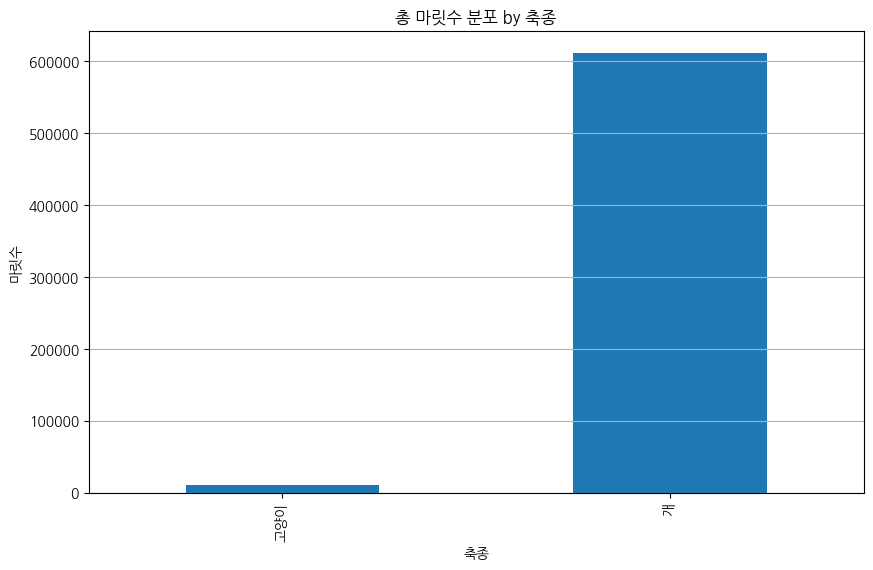

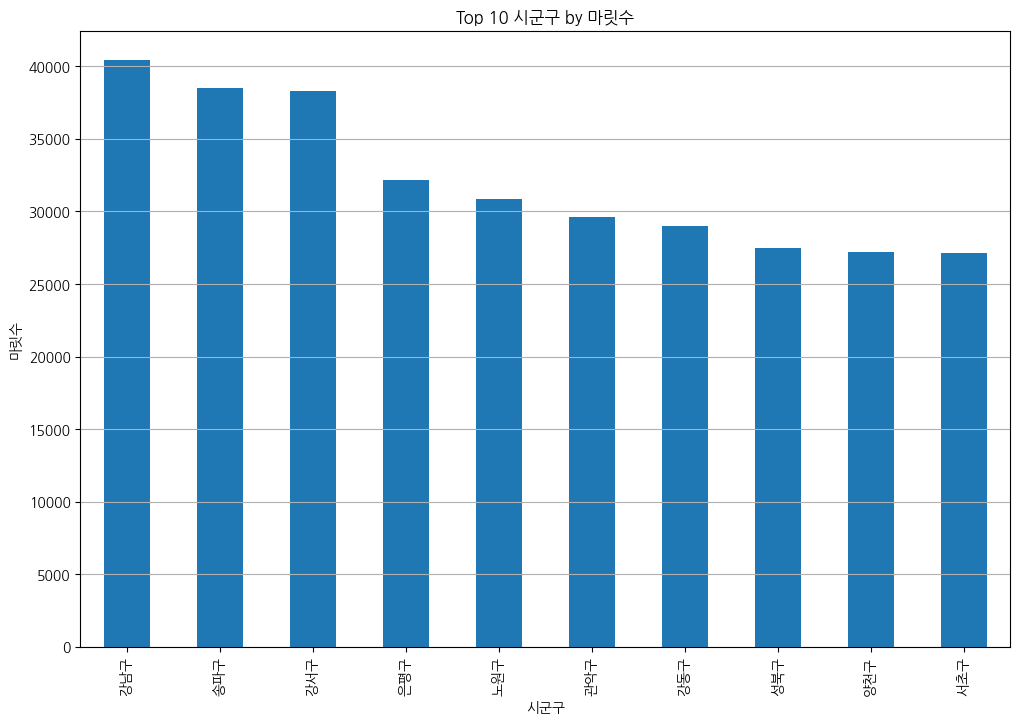

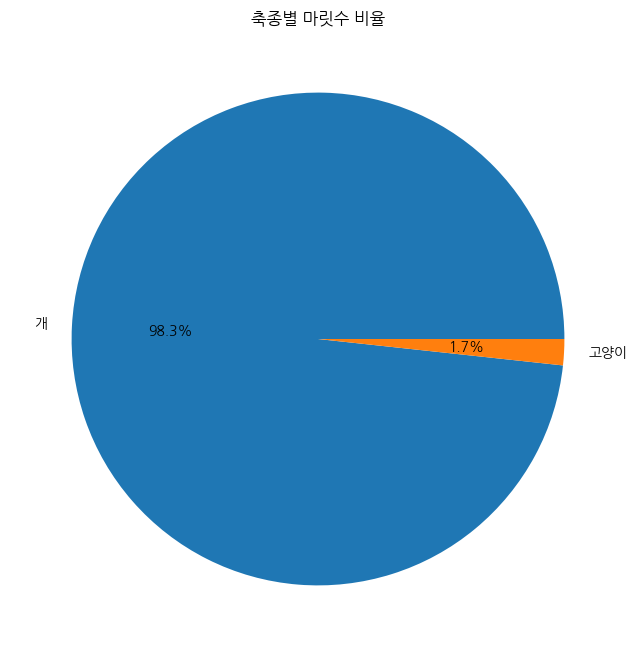

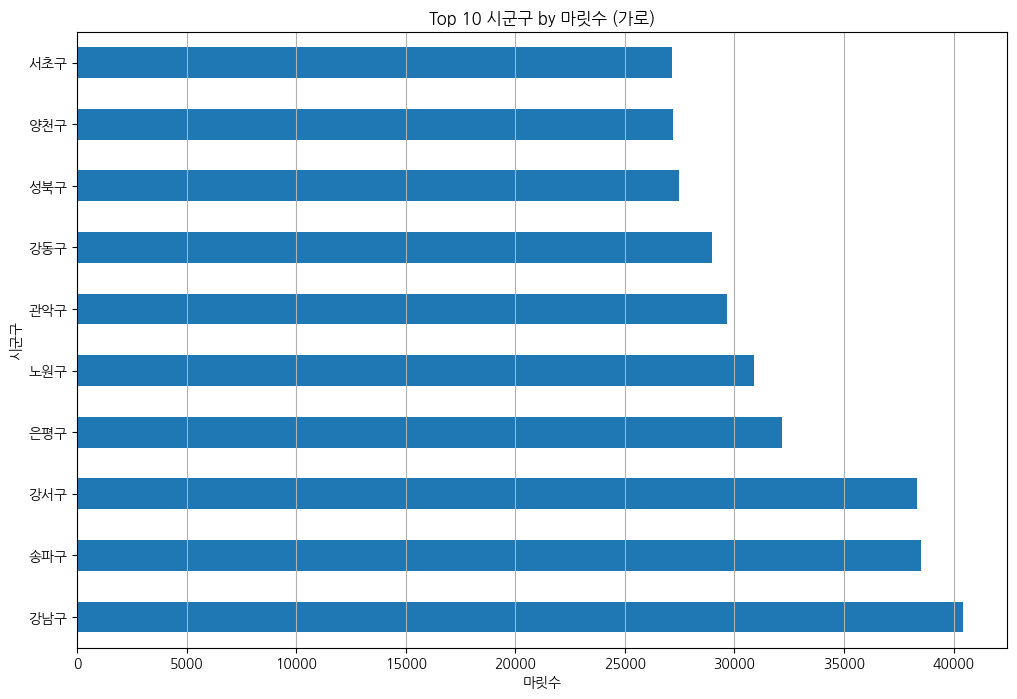

In [9]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# Group data by '축종' and sum '마릿수'
species_count = seoul_regiest.groupby('축종')['마릿수'].sum()

# Group data by '시군구' and sum '마릿수'
district_count = seoul_regiest.groupby('시군구')['마릿수'].sum()

# Plot 1: Bar chart for '축종' distribution
plt.figure(figsize=(10, 6))
species_count.sort_values().plot(kind='bar', title='총 마릿수 분포 by 축종')
plt.ylabel('마릿수')
plt.xlabel('축종')
plt.grid(axis='y')
plt.show()

# Plot 2: Bar chart for '시군구' distribution (Top 10)
plt.figure(figsize=(12, 8))
district_count.sort_values(ascending=False).head(10).plot(kind='bar', title='Top 10 시군구 by 마릿수')
plt.ylabel('마릿수')
plt.xlabel('시군구')
plt.grid(axis='y')
plt.show()

# Plot 3: Pie chart for '축종' distribution
plt.figure(figsize=(8, 8))
species_count.plot(kind='pie', autopct='%1.1f%%', title='축종별 마릿수 비율', ylabel='')
plt.show()

# Plot 4: Horizontal bar chart for '시군구' distribution (Top 10)
plt.figure(figsize=(12, 8))
district_count.sort_values(ascending=False).head(10).plot(kind='barh', title='Top 10 시군구 by 마릿수 (가로)')
plt.xlabel('마릿수')
plt.ylabel('시군구')
plt.grid(axis='x')
plt.show()


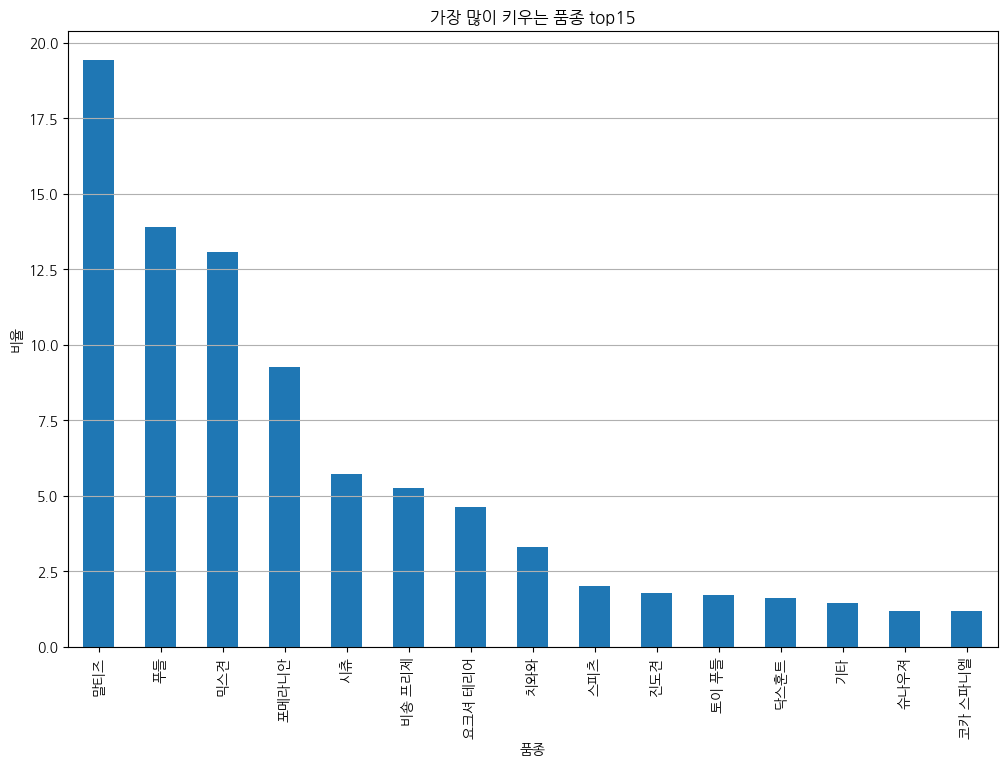

In [11]:
breed_percentage = seoul_regiest.groupby('품종')['마릿수'].sum()
breed_percentage_share = (breed_percentage / breed_percentage.sum()) * 100
breed_percentage_share_sorted = breed_percentage_share.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
breed_percentage_share_sorted.head(15).plot(kind='bar', title='가장 많이 키우는 품종 top15')
plt.ylabel('비율')
plt.xlabel('품종')
plt.grid(axis='y')
plt.show()


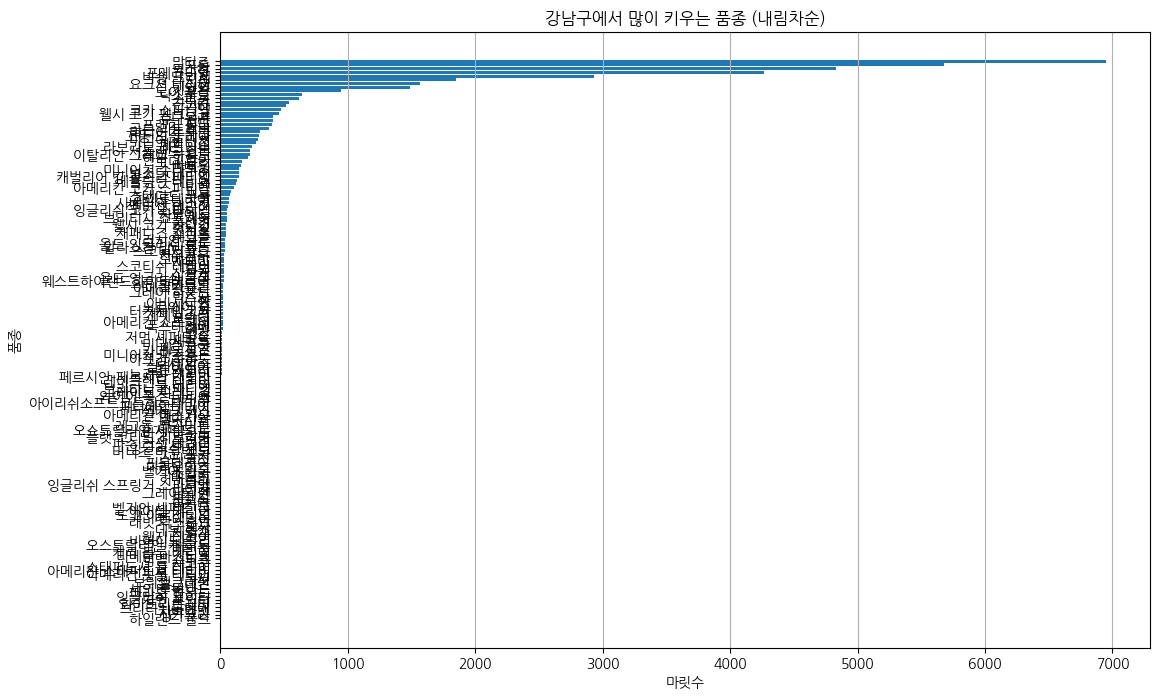

In [12]:
# Filter data for 강남구
gangnam_data = seoul_regiest[seoul_regiest['시군구'] == '강남구']

# Sort by '마릿수' in descending order
gangnam_sorted = gangnam_data.sort_values(by='마릿수', ascending=False)

# Plot: Most raised breeds in 강남구
plt.figure(figsize=(12, 8))
plt.barh(gangnam_sorted['품종'], gangnam_sorted['마릿수'])
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.title('강남구에서 많이 키우는 품종 (내림차순)')
plt.xlabel('마릿수')
plt.ylabel('품종')
plt.grid(axis='x')
plt.show()


/tmp/ipykernel_40200/254181777.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(10, '마릿수'))


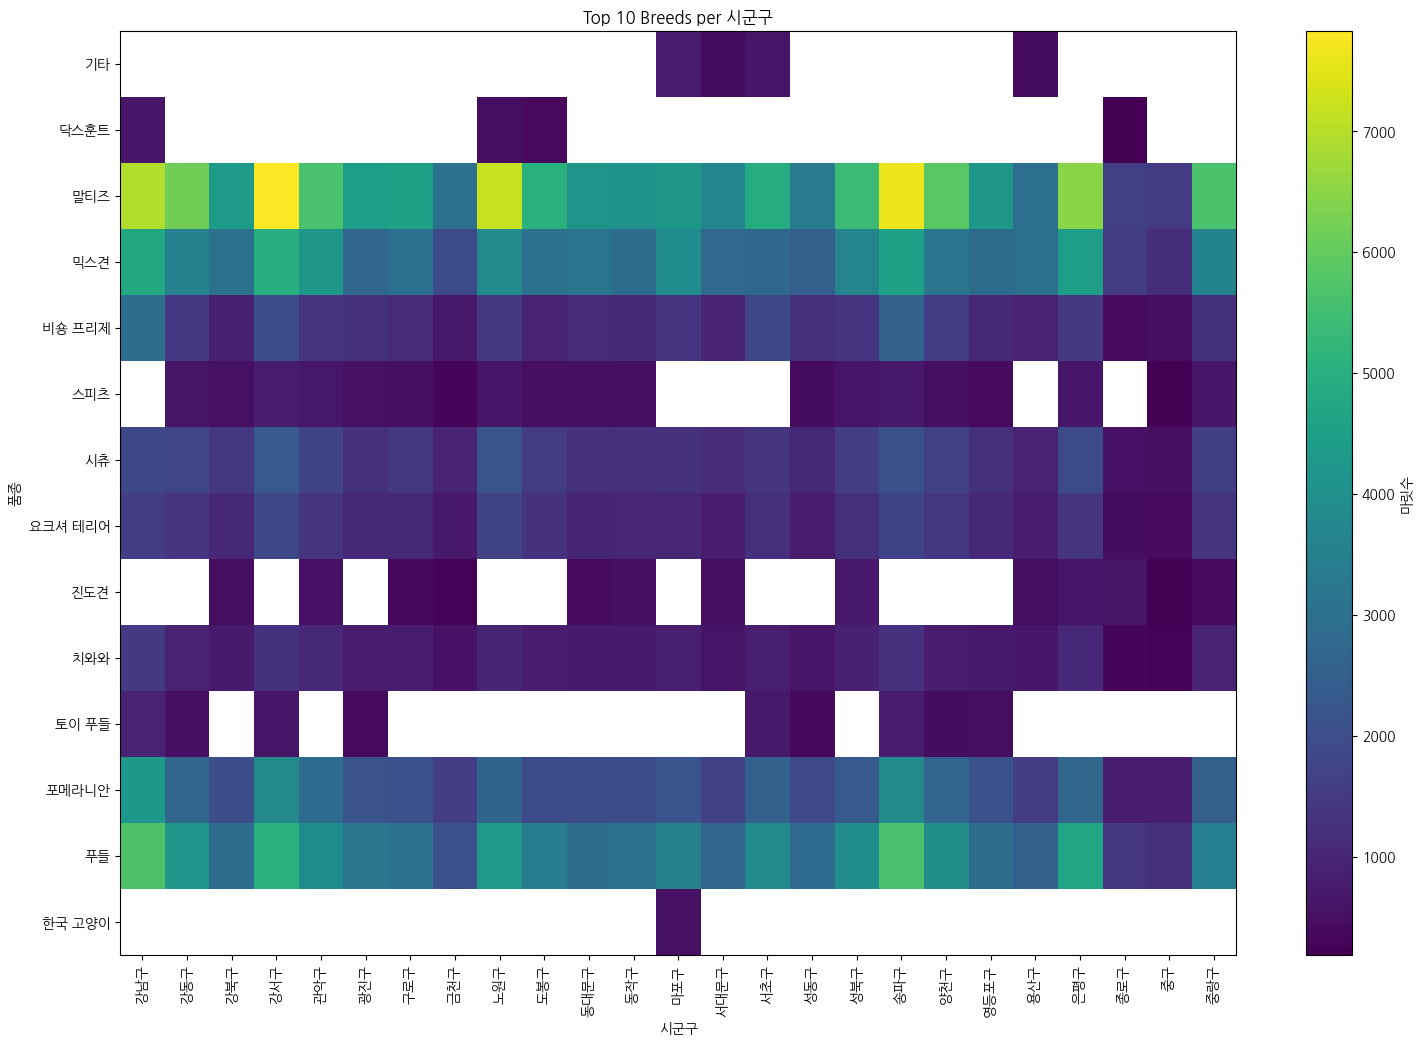

In [13]:
# Get the top 10 breeds for each district
top10_breeds_per_district = (
    seoul_regiest.groupby('시군구', group_keys=False)
    .apply(lambda x: x.nlargest(10, '마릿수'))
)

# Pivot the data for visualization
top10_pivot = top10_breeds_per_district.pivot(index='품종', columns='시군구', values='마릿수')

# Plot: Top 10 breeds per district as a heatmap
plt.figure(figsize=(18, 12))
plt.imshow(top10_pivot, aspect='auto', cmap='viridis', interpolation='nearest')
plt.colorbar(label='마릿수')
plt.title('Top 10 Breeds per 시군구')
plt.xlabel('시군구')
plt.ylabel('품종')
plt.xticks(range(len(top10_pivot.columns)), top10_pivot.columns, rotation=90)
plt.yticks(range(len(top10_pivot.index)), top10_pivot.index)
plt.show()


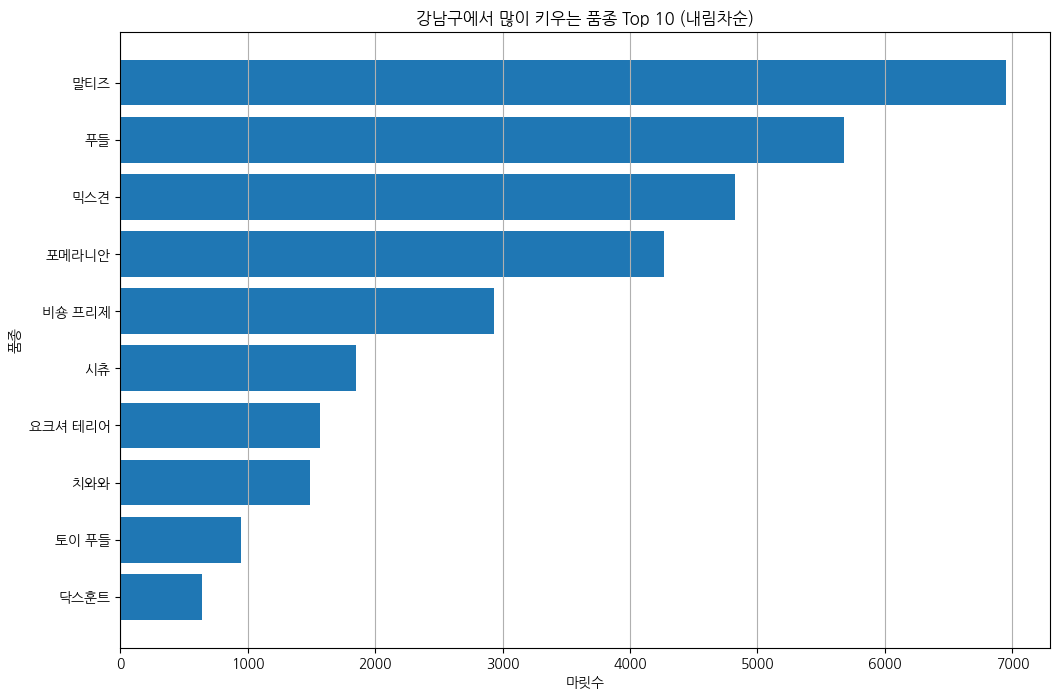

In [14]:
# Filter data for 강남구 and get top 10 breeds
gangnam_top10 = gangnam_data.sort_values(by='마릿수', ascending=False).head(10)

# Plot: Top 10 breeds in 강남구
plt.figure(figsize=(12, 8))
plt.barh(gangnam_top10['품종'], gangnam_top10['마릿수'])
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.title('강남구에서 많이 키우는 품종 Top 10 (내림차순)')
plt.xlabel('마릿수')
plt.ylabel('품종')
plt.grid(axis='x')
plt.show()


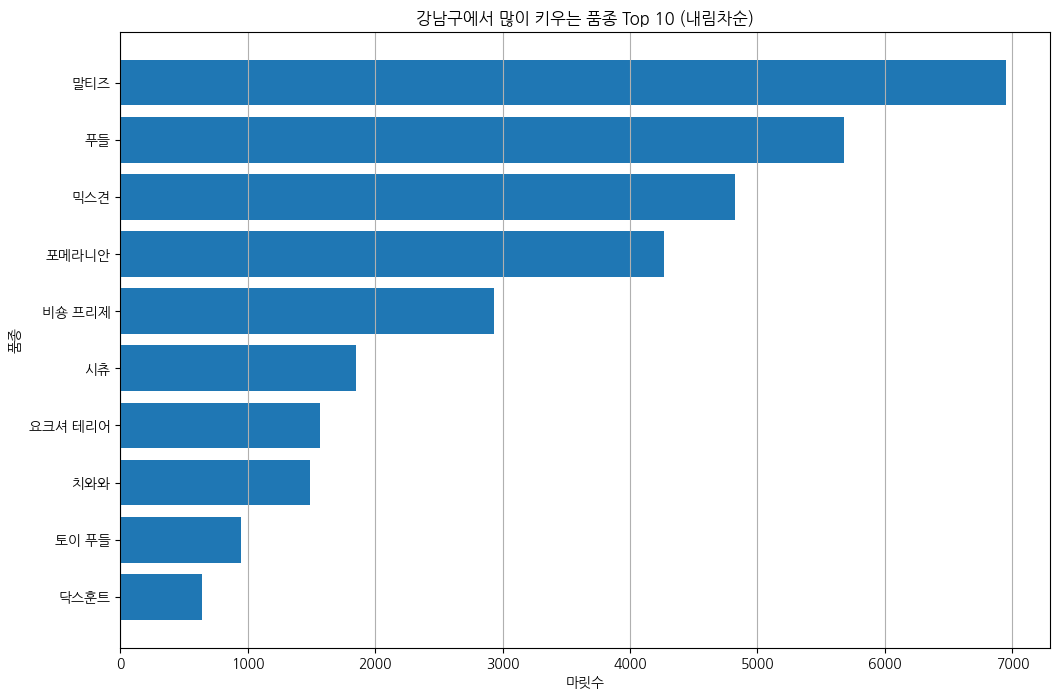

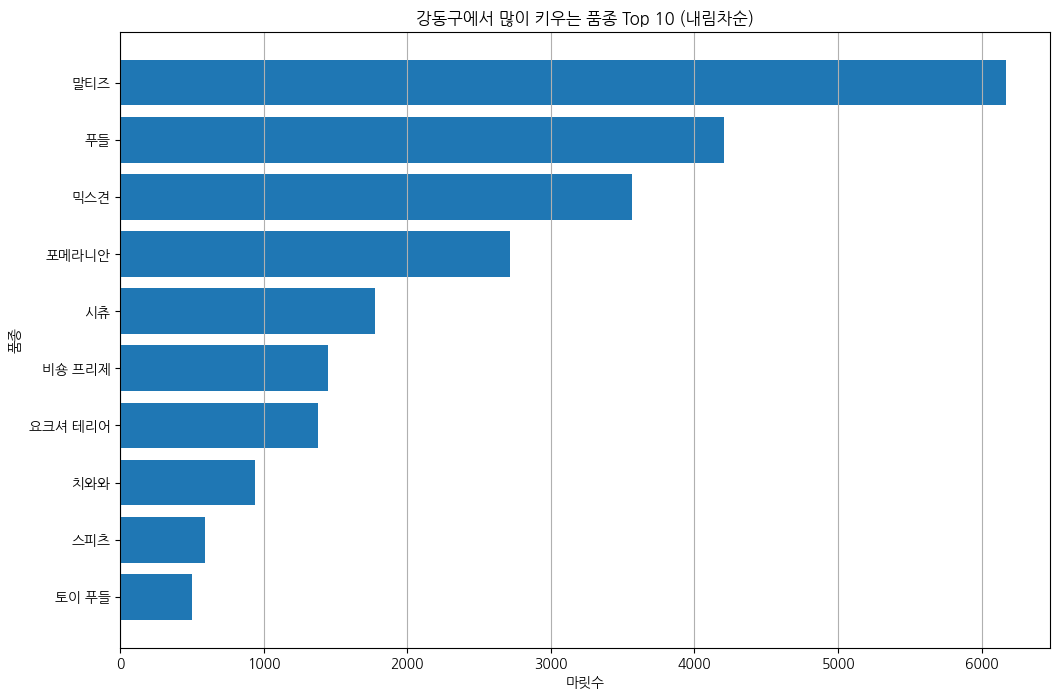

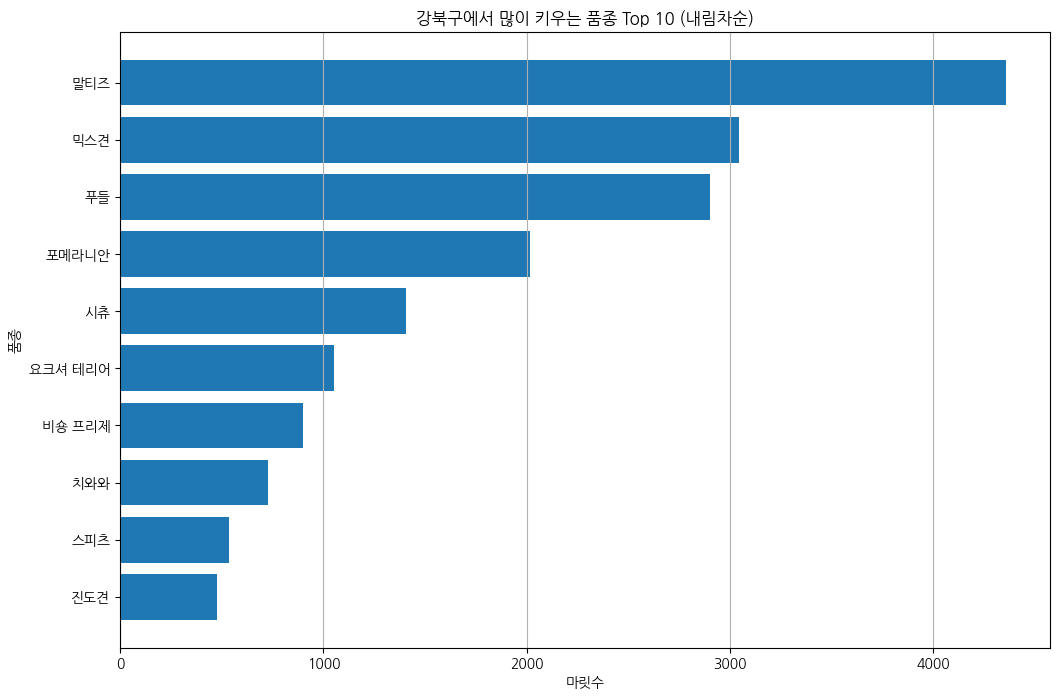

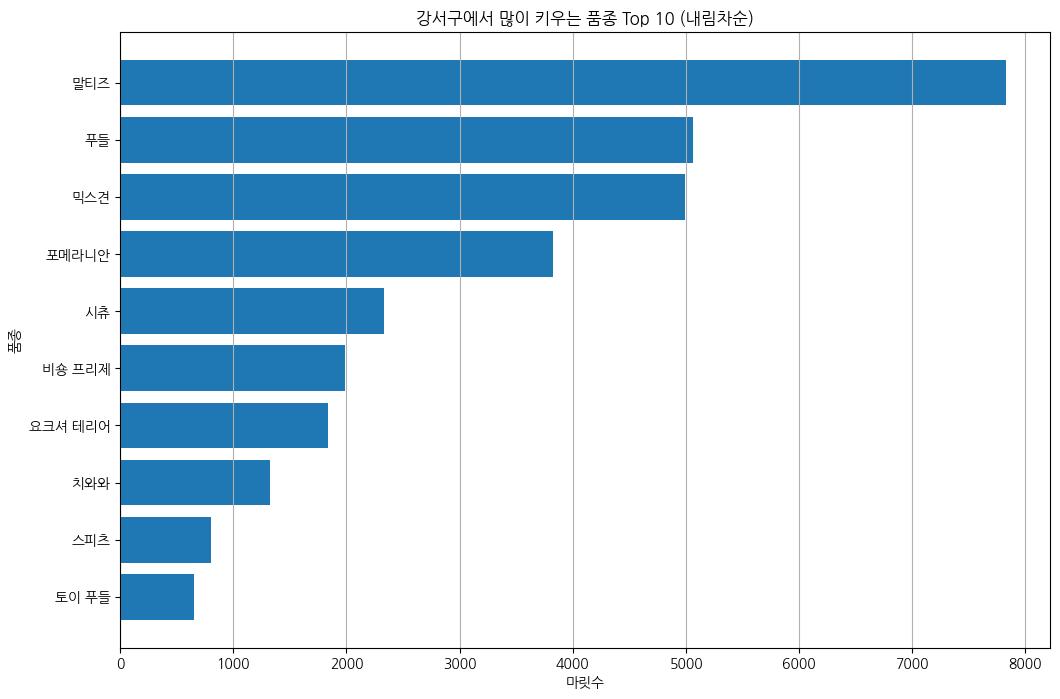

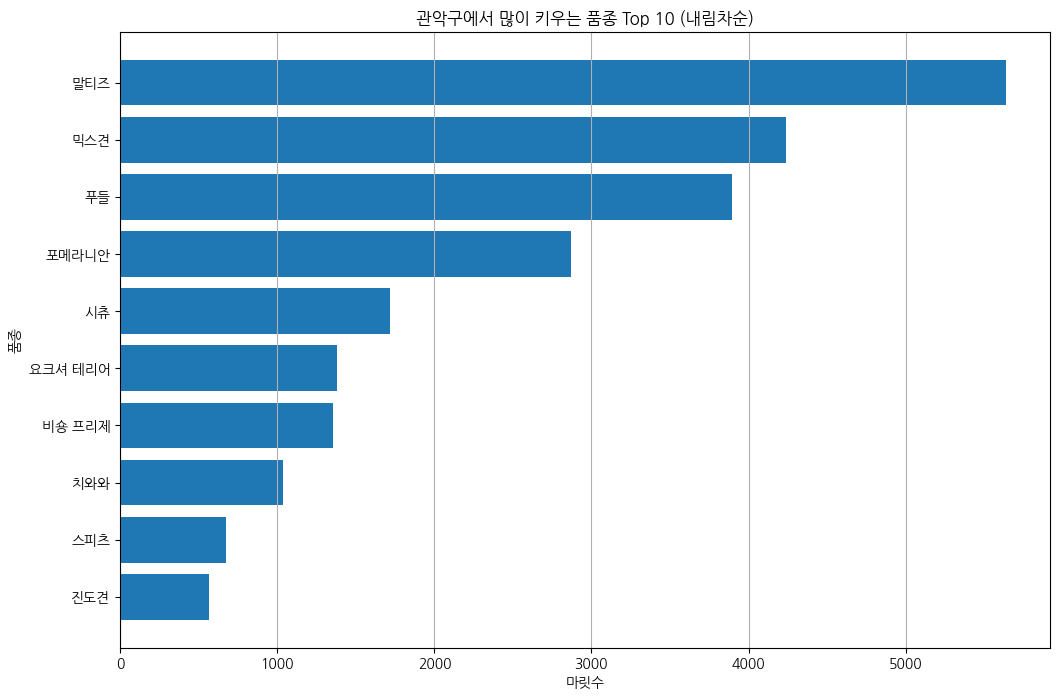

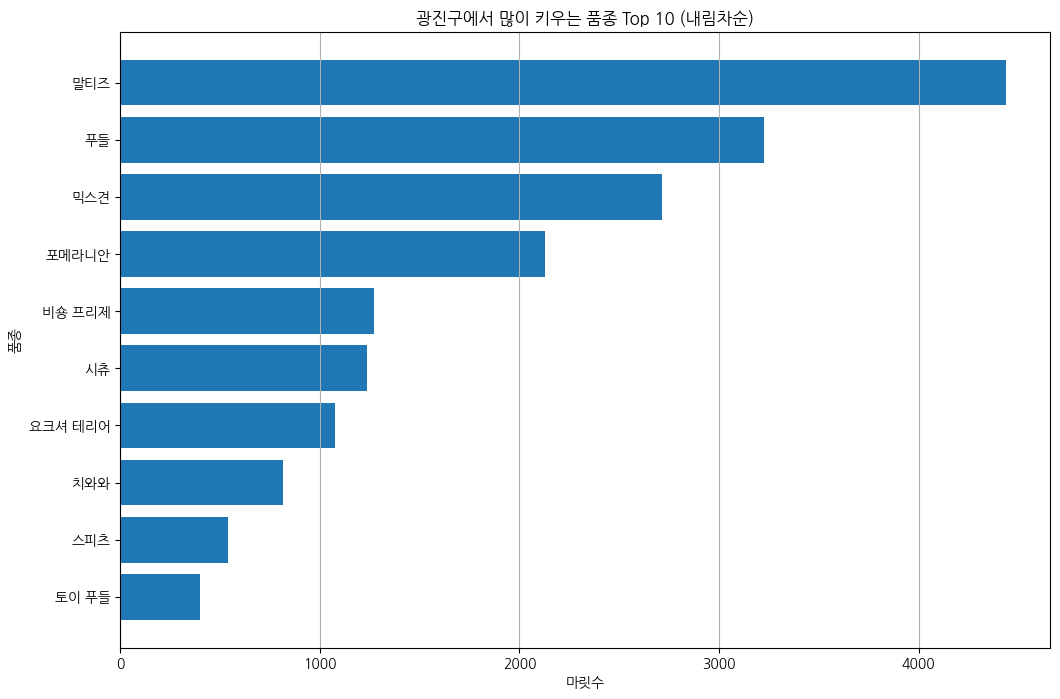

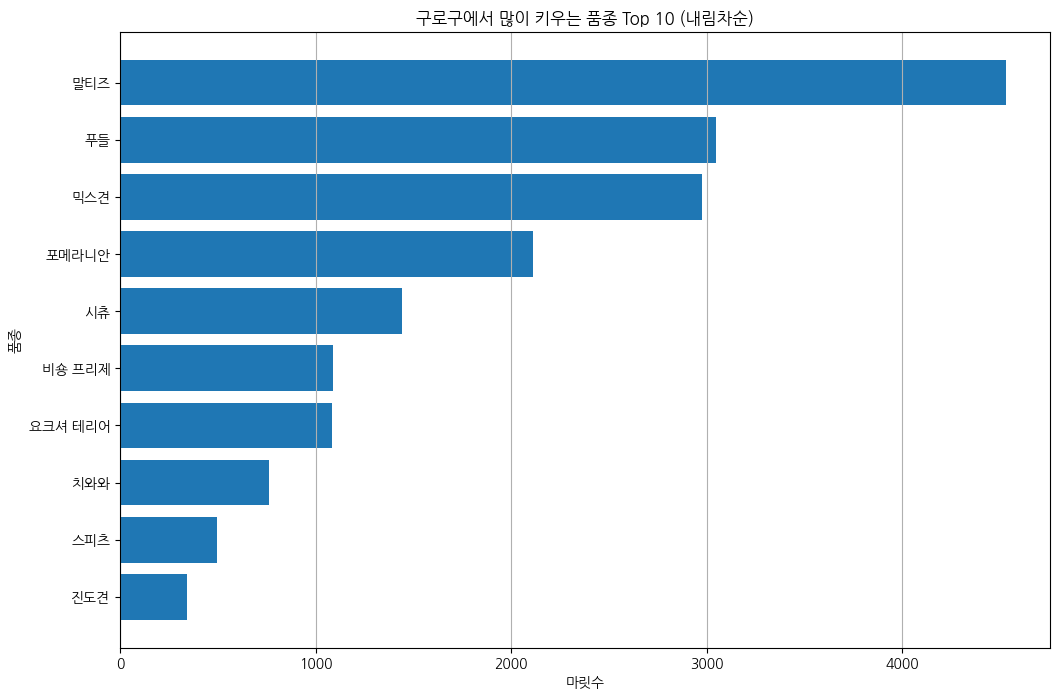

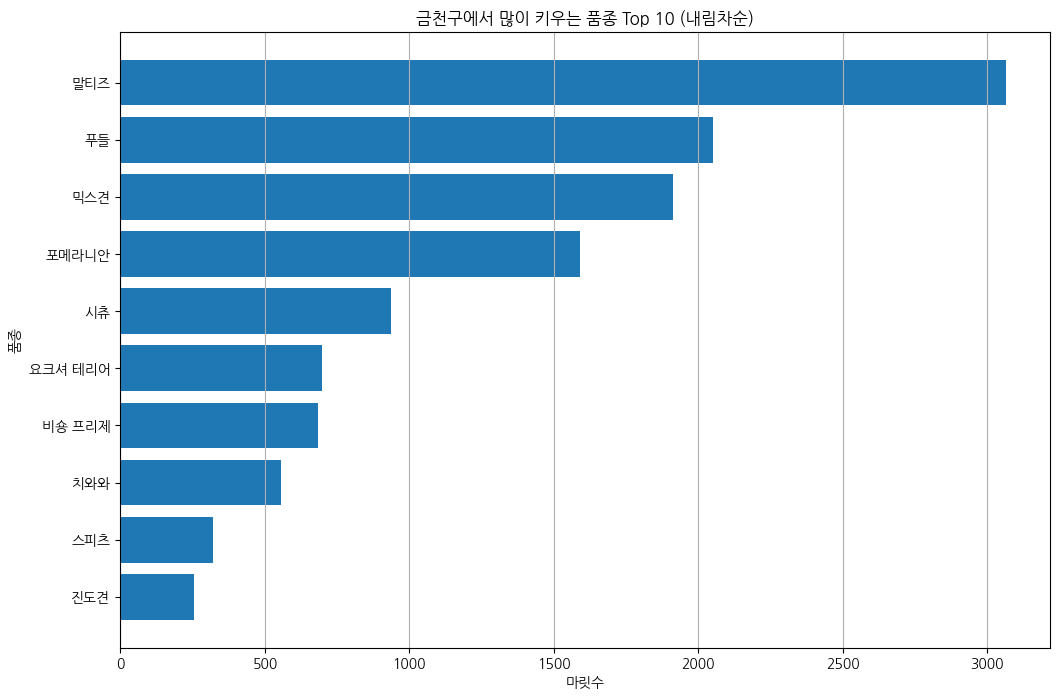

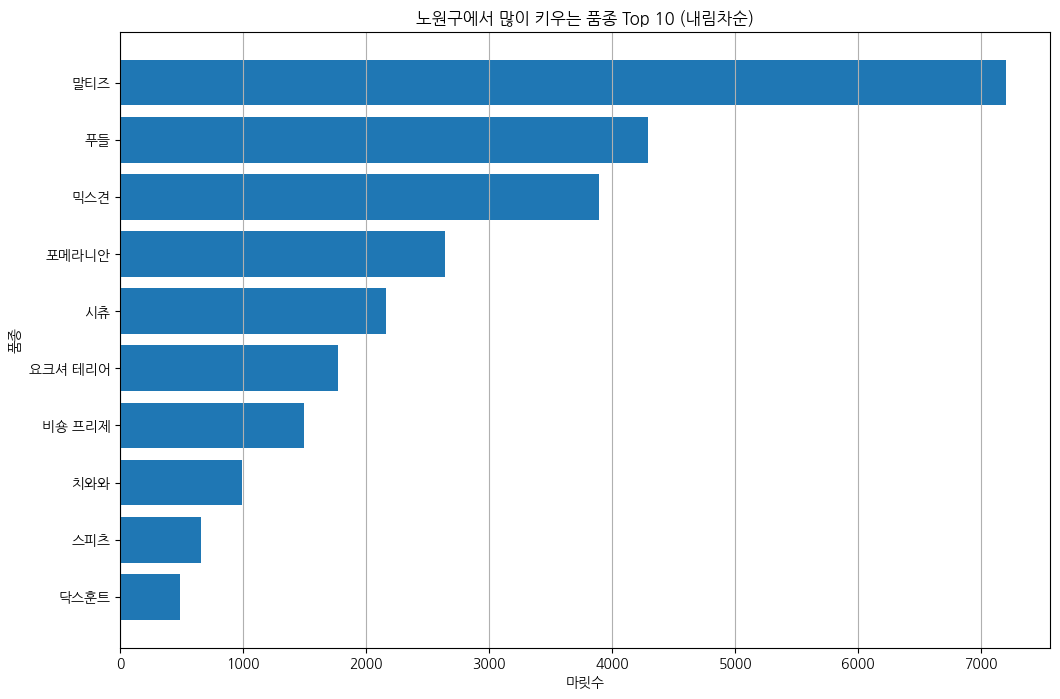

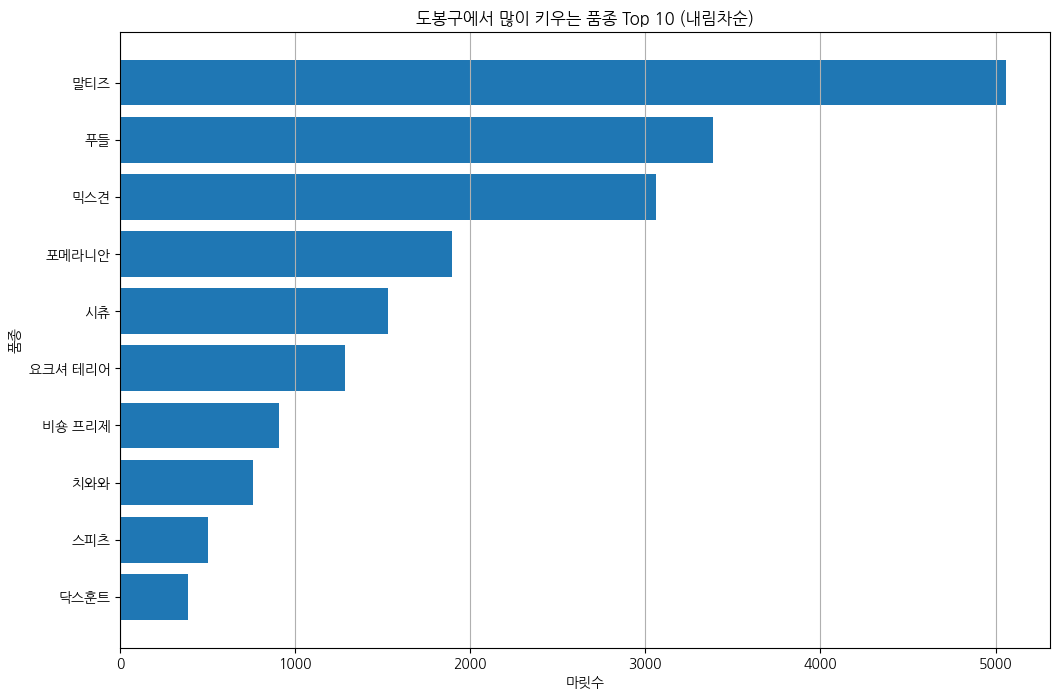

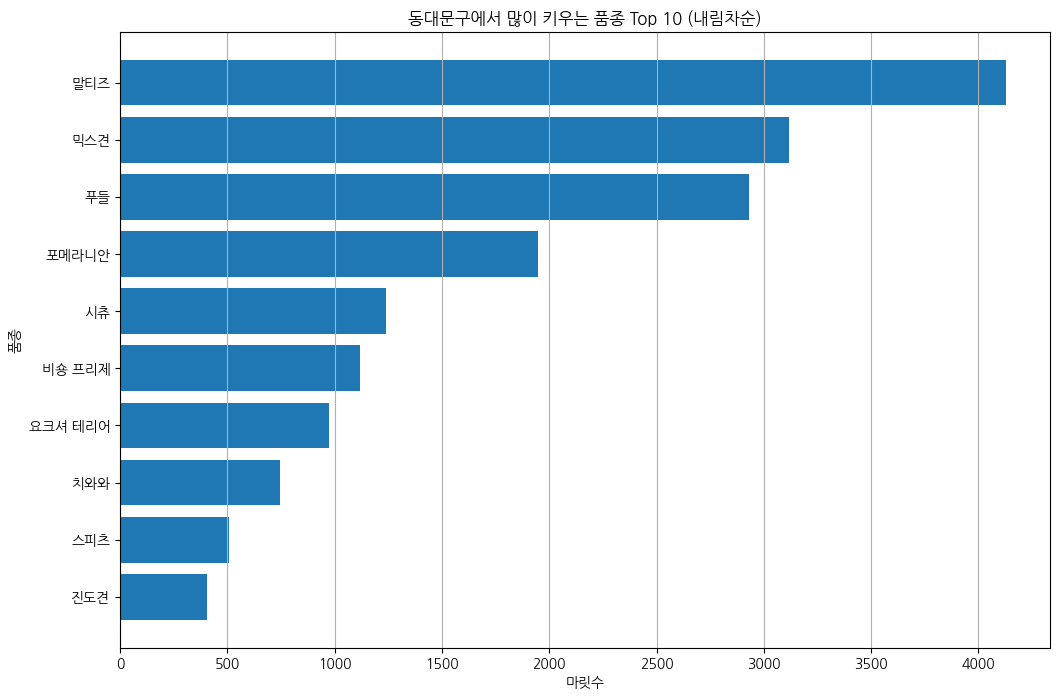

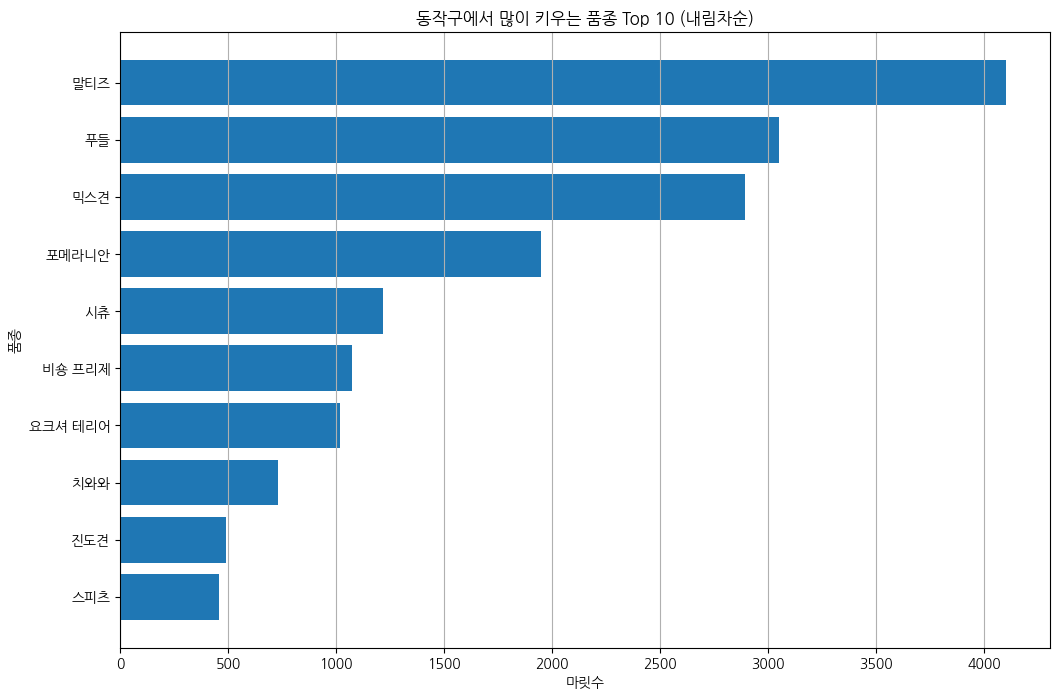

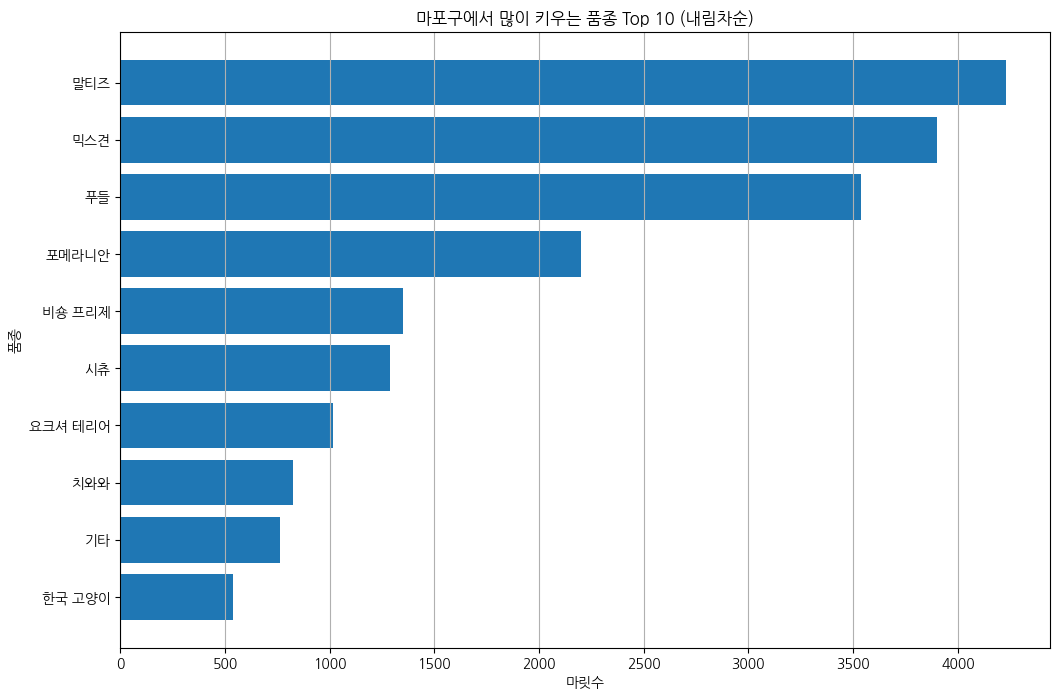

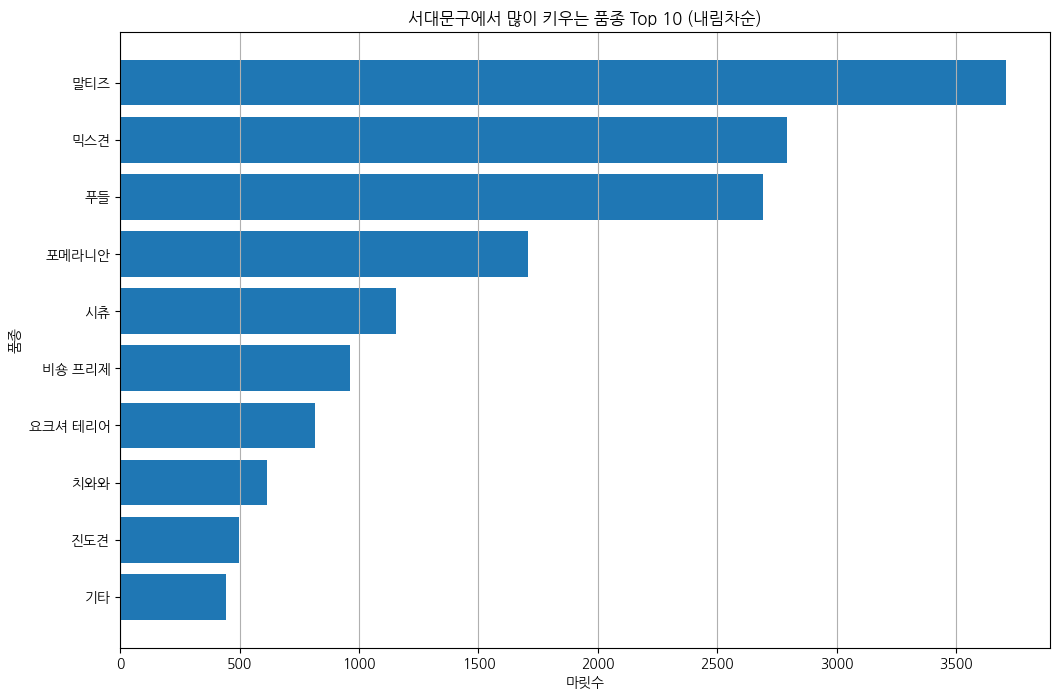

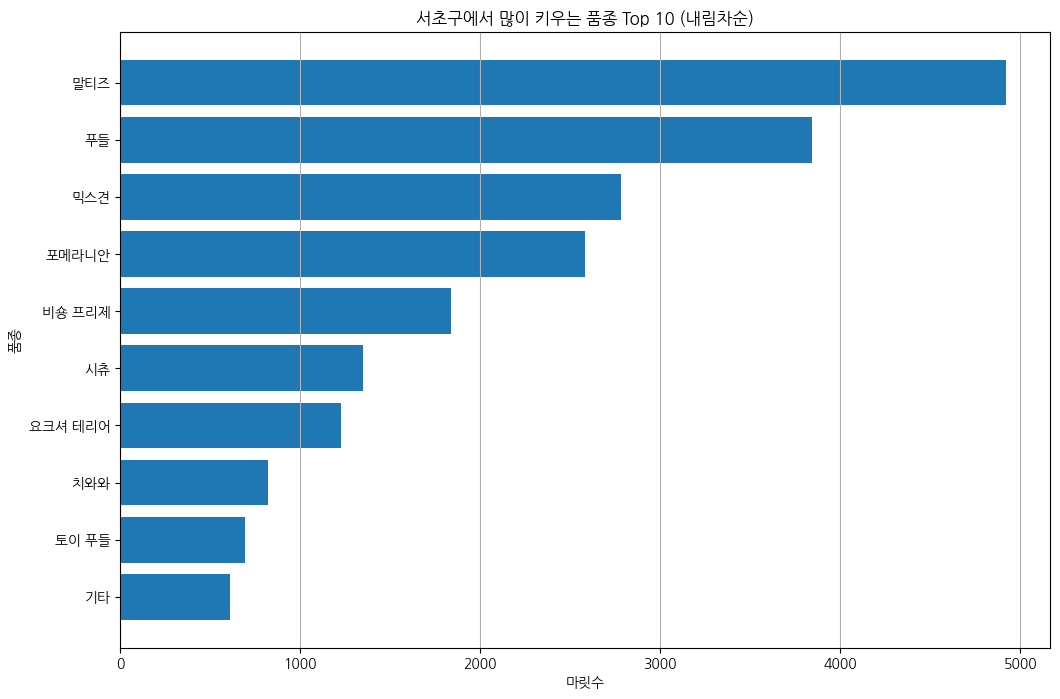

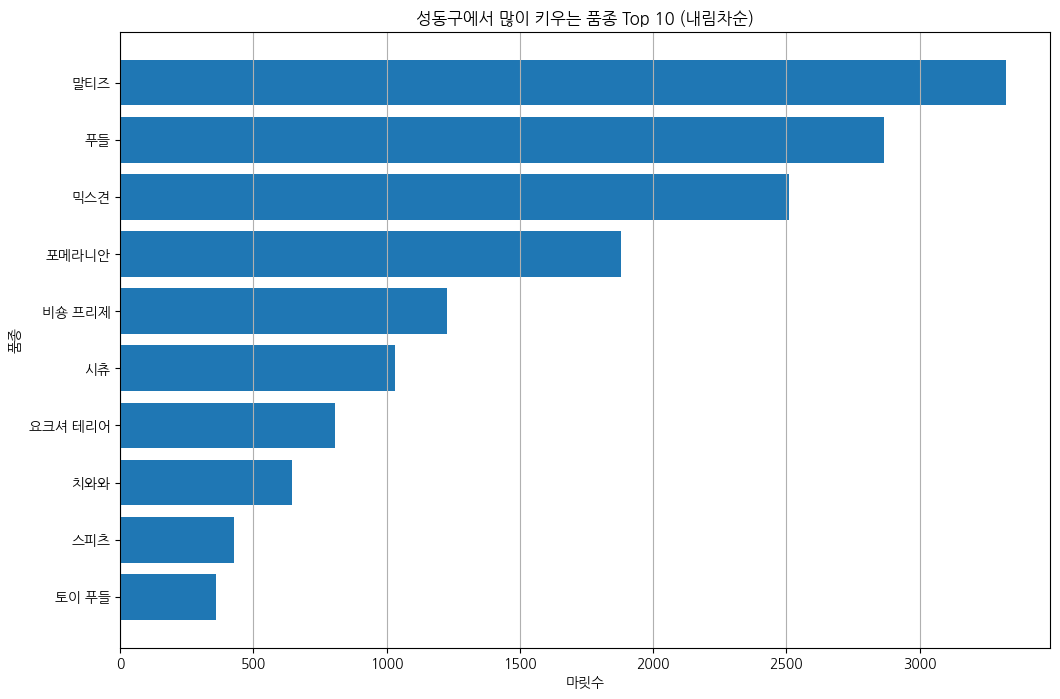

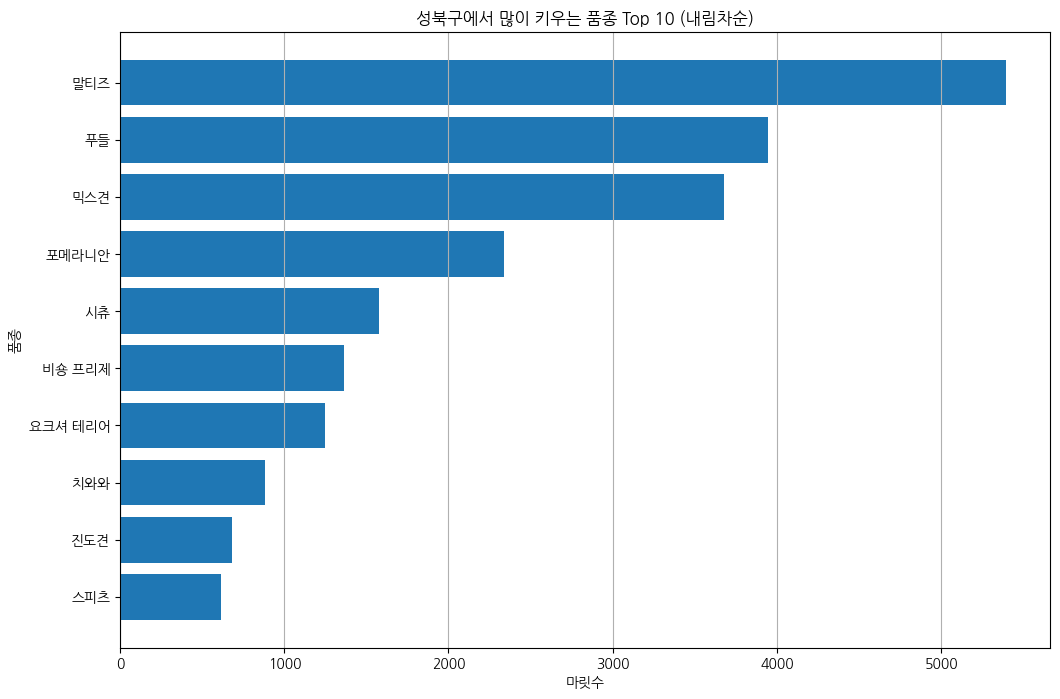

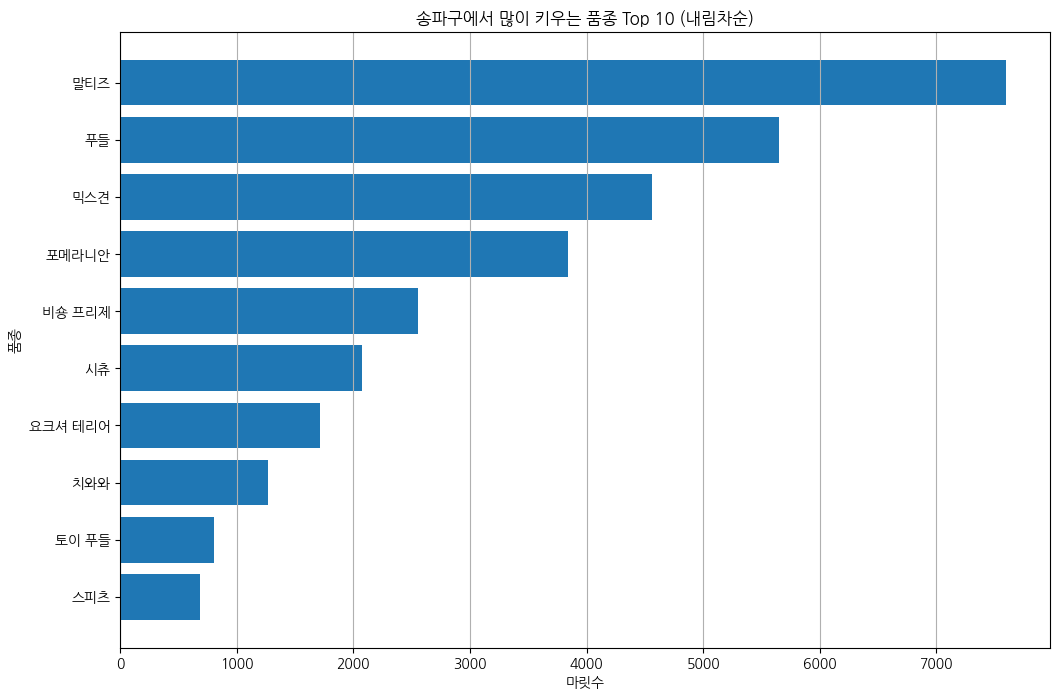

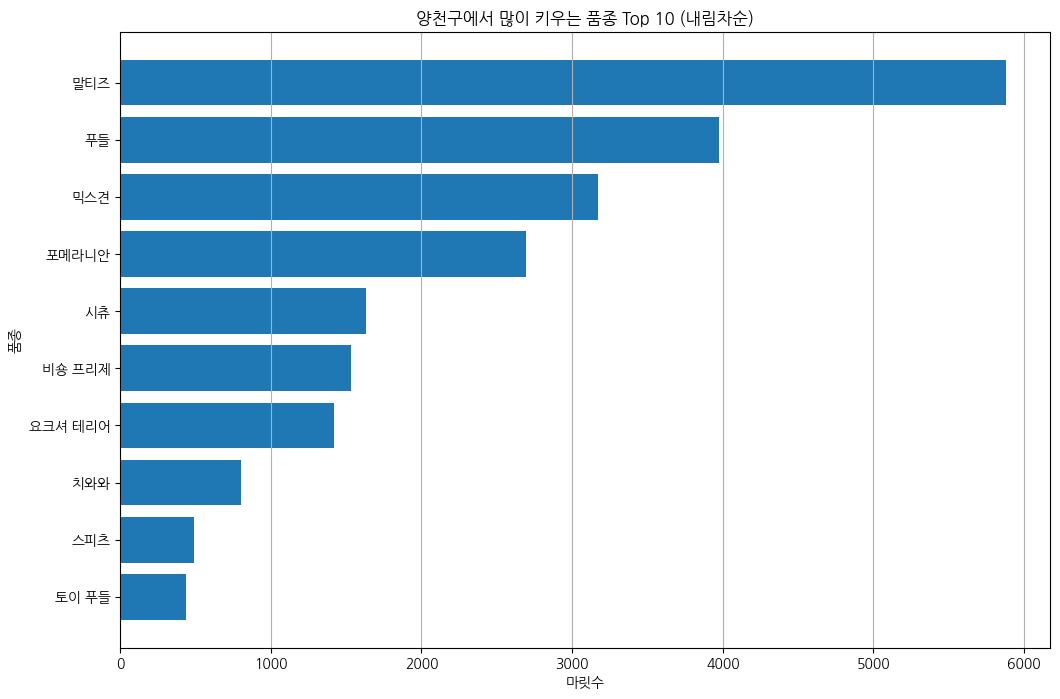

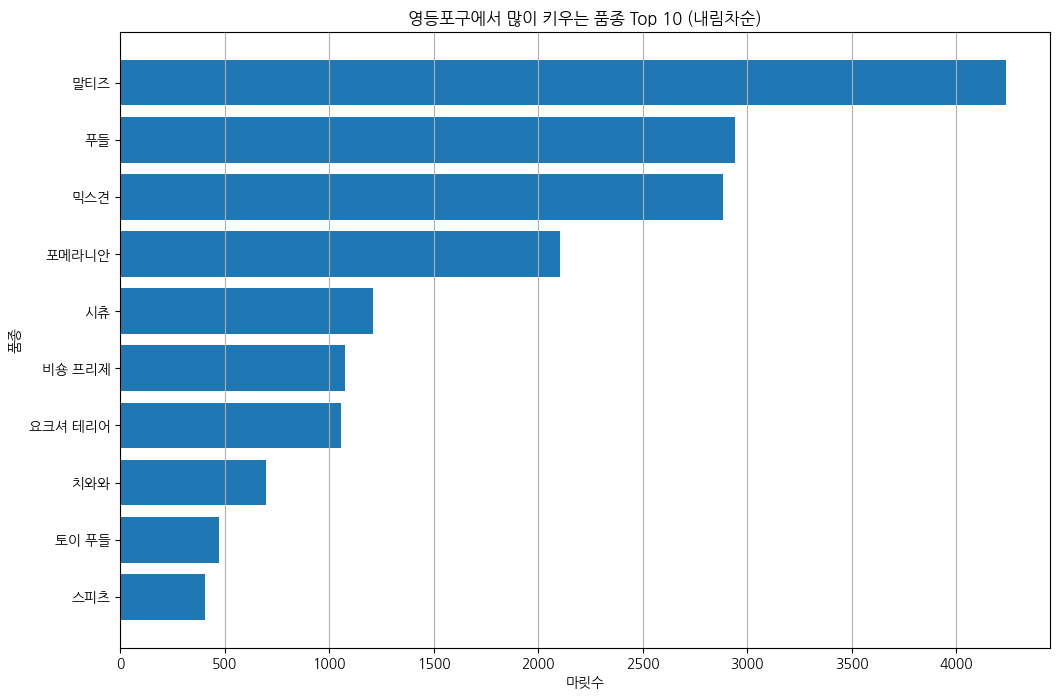

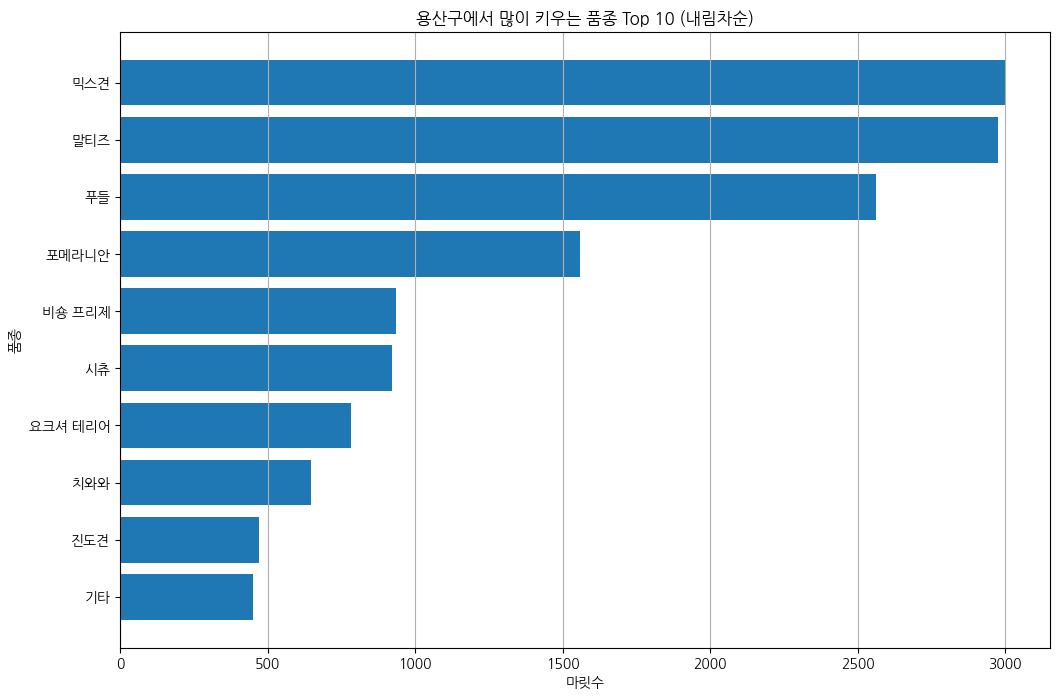

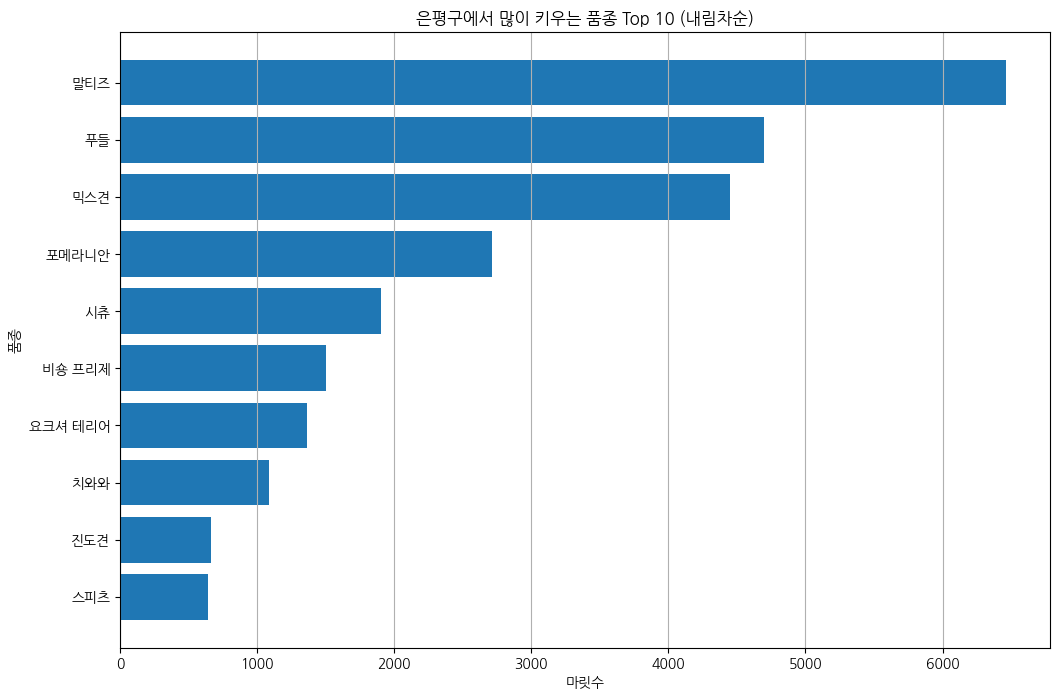

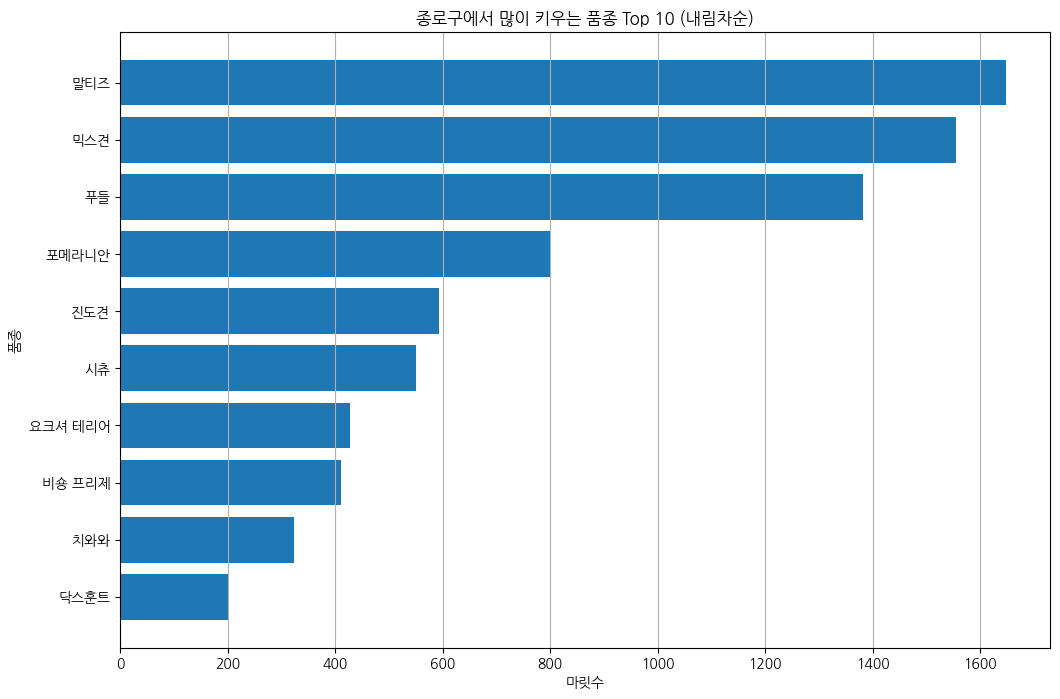

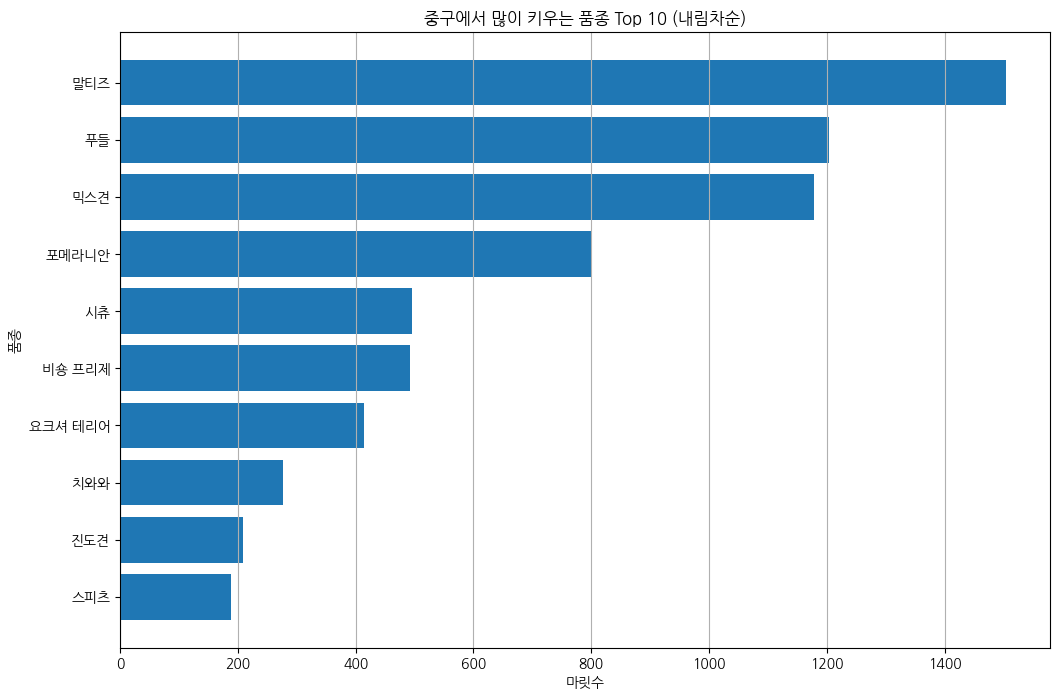

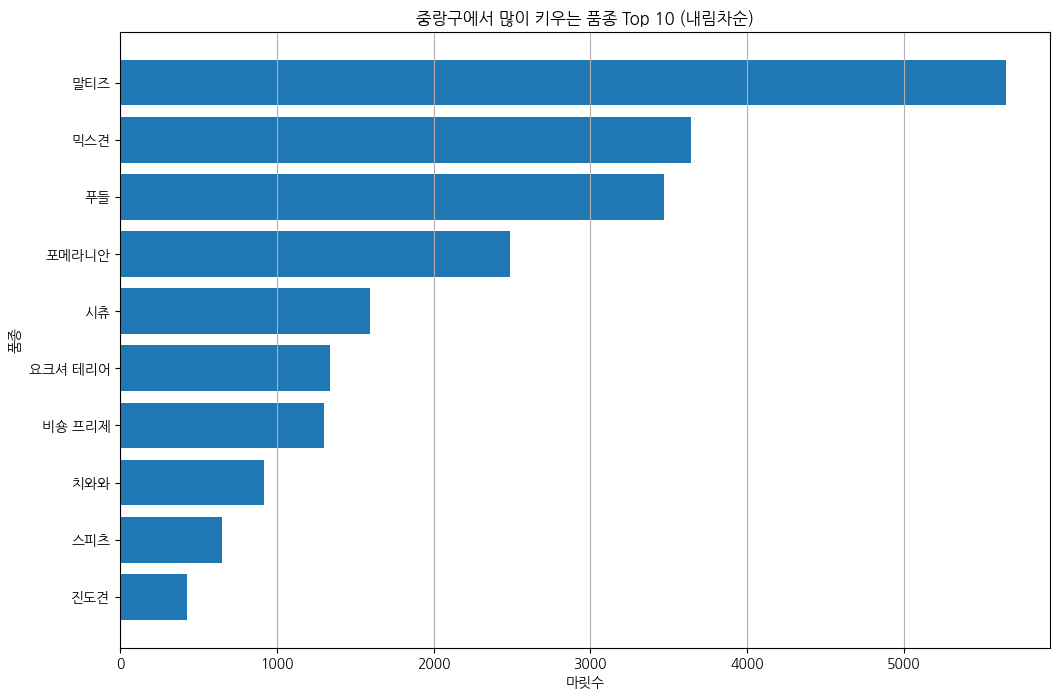

In [15]:
# Get unique districts
districts = seoul_regiest['시군구'].unique()

# Plot top 10 breeds for each district
for district in districts:
    district_data = seoul_regiest[seoul_regiest['시군구'] == district]
    district_top10 = district_data.sort_values(by='마릿수', ascending=False).head(10)

    # Plot: Top 10 breeds for the current district
    plt.figure(figsize=(12, 8))
    plt.barh(district_top10['품종'], district_top10['마릿수'])
    plt.gca().invert_yaxis()  # Invert y-axis for descending order
    plt.title(f'{district}에서 많이 키우는 품종 Top 10 (내림차순)')
    plt.xlabel('마릿수')
    plt.ylabel('품종')
    plt.grid(axis='x')
    plt.show()


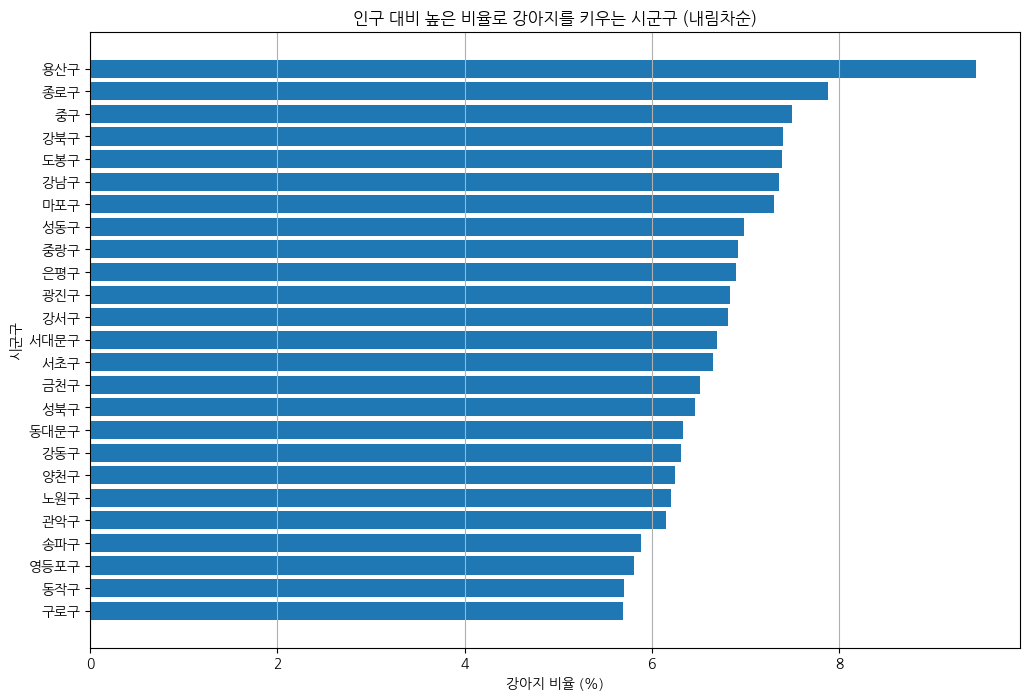

In [16]:
# Create a dataframe for population and calculate dog ownership ratio
population_data = {
    "시군구": [
        "송파구", "강서구", "강남구", "노원구", "관악구", "은평구", "강동구", "양천구", "성북구", "서초구",
        "구로구", "중랑구", "동작구", "영등포구", "마포구", "동대문구", "광진구", "도봉구", "서대문구",
        "강북구", "성동구", "금천구", "용산구", "종로구", "중구"
    ],
    "인구수": [
        653989, 562550, 549154, 497237, 481872, 466474, 459389, 435548, 424916, 407768,
        392311, 382284, 378360, 374985, 363679, 340983, 335335, 306722, 305857, 287490,
        277090, 227457, 212175, 139378, 121322
    ]
}

population_df = pd.DataFrame(population_data)

# Merge with the dog ownership data (sum of '마릿수' per district)
dog_count_per_district = seoul_regiest.groupby('시군구')['마릿수'].sum().reset_index()
merged_data = pd.merge(population_df, dog_count_per_district, on='시군구')

# Calculate dog ownership ratio
merged_data['강아지 비율 (%)'] = (merged_data['마릿수'] / merged_data['인구수']) * 100

# Sort by dog ownership ratio in descending order
merged_data_sorted = merged_data.sort_values(by='강아지 비율 (%)', ascending=False)

# Plot the results
plt.figure(figsize=(12, 8))
plt.barh(merged_data_sorted['시군구'], merged_data_sorted['강아지 비율 (%)'])
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.title('인구 대비 높은 비율로 강아지를 키우는 시군구 (내림차순)')
plt.xlabel('강아지 비율 (%)')
plt.ylabel('시군구')
plt.grid(axis='x')
plt.show()


In [4]:
e_seoul_ugi_df = pd.read_csv('')

/tmp/ipykernel_6834/827690536.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")


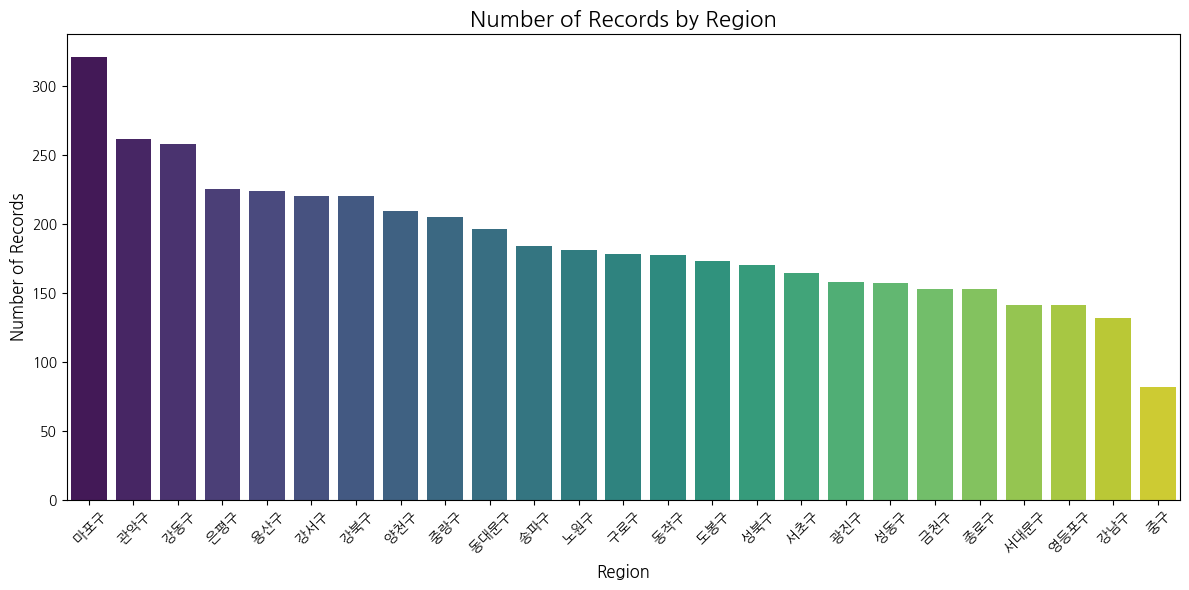

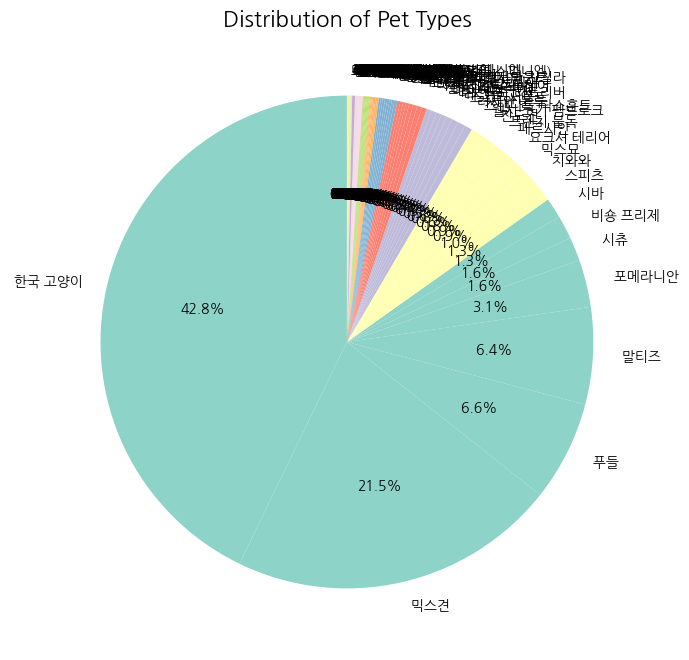

/tmp/ipykernel_6834/827690536.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_counts.index, y=results_counts.values, palette="magma")


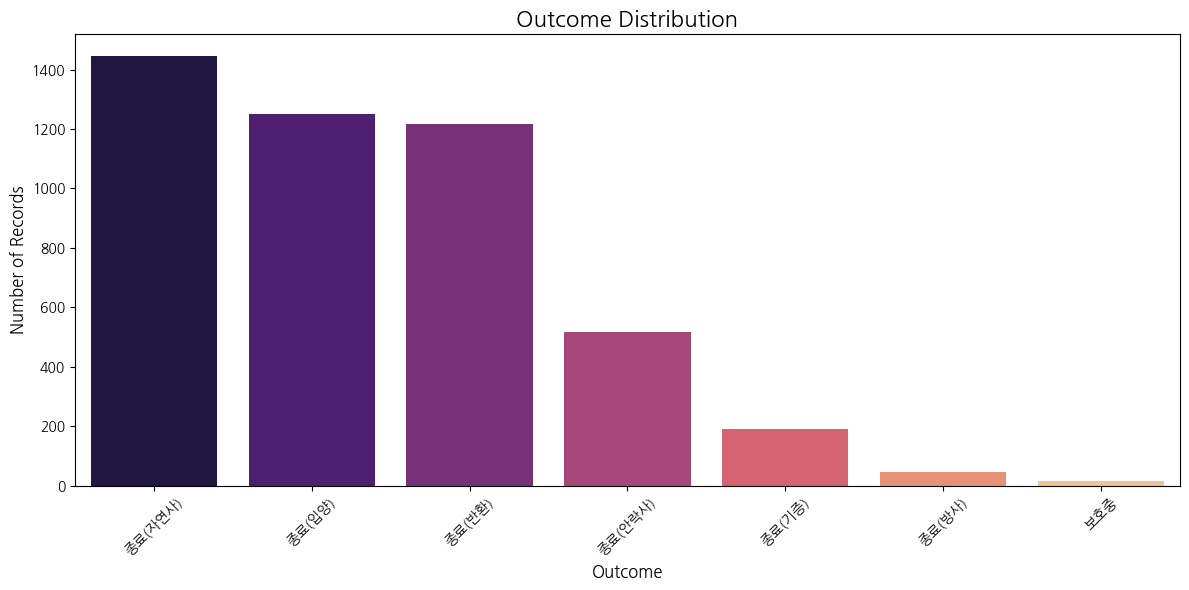

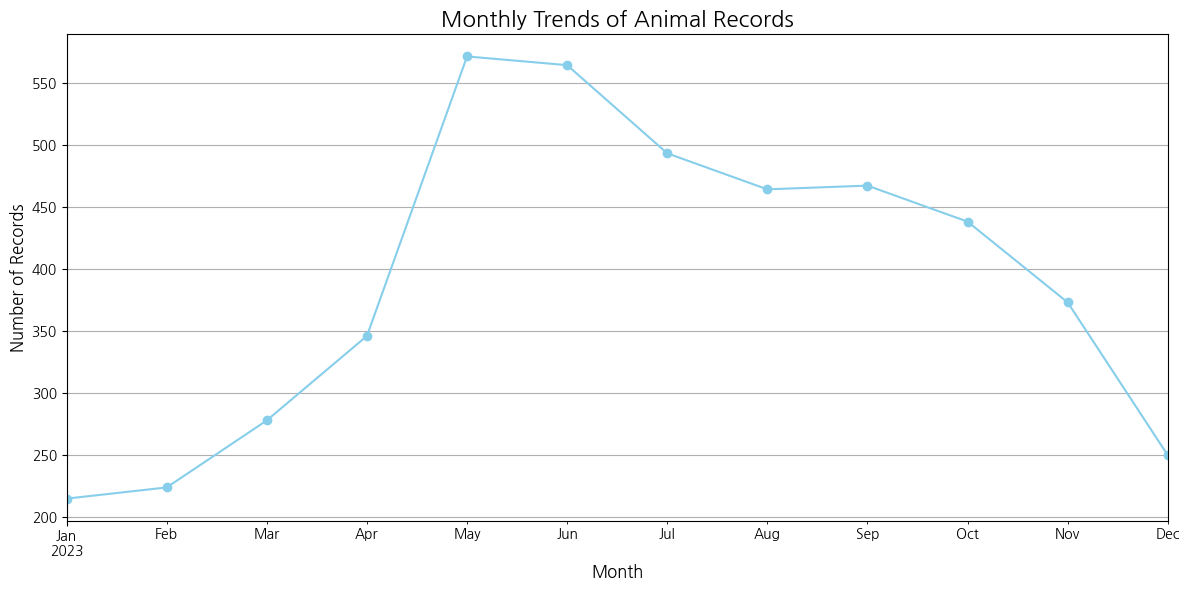

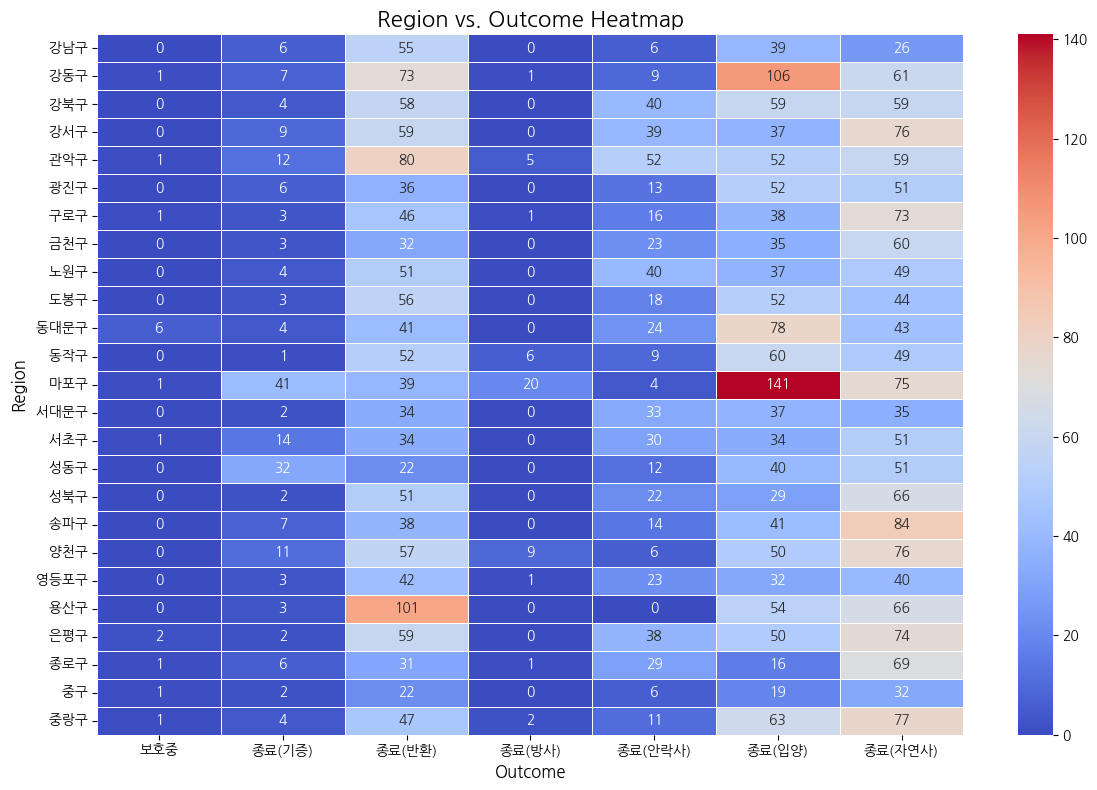

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib



# Convert 'date' column to datetime format for better analysis
e_seoul_ugi_df['date'] = pd.to_datetime(e_seoul_ugi_df['date'], format='%Y%m%d')

# Aggregating data for various analyses
region_counts = e_seoul_ugi_df['region_id'].value_counts()
pet_type_counts = e_seoul_ugi_df['pet_type_id'].value_counts()
results_counts = e_seoul_ugi_df['result_id'].value_counts()
monthly_trends = e_seoul_ugi_df.groupby(e_seoul_ugi_df['date'].dt.to_period('M')).size()

# 1. Bar chart: Number of records by region
plt.figure(figsize=(12, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title('지역구별 유기견수', fontsize=16)
plt.xlabel('지역구', fontsize=12)
plt.ylabel('유기견수', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Pie chart: Distribution by pet type
plt.figure(figsize=(8, 8))
pet_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3', ylabel='')
plt.title('Distribution of Pet Types', fontsize=16)
plt.show()

# 3. Bar chart: Outcomes of the animals
plt.figure(figsize=(12, 6))
sns.barplot(x=results_counts.index, y=results_counts.values, palette="magma")
plt.title('Outcome Distribution', fontsize=16)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Line chart: Monthly trends in records
plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='line', marker='o', color='skyblue')
plt.title('Monthly Trends of Animal Records', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

# 5. Heatmap: Region vs. Outcome count matrix
region_outcome_matrix = e_seoul_ugi_df.groupby(['region_id', 'result_id']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(region_outcome_matrix, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5)
plt.title('Region vs. Outcome Heatmap', fontsize=16)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

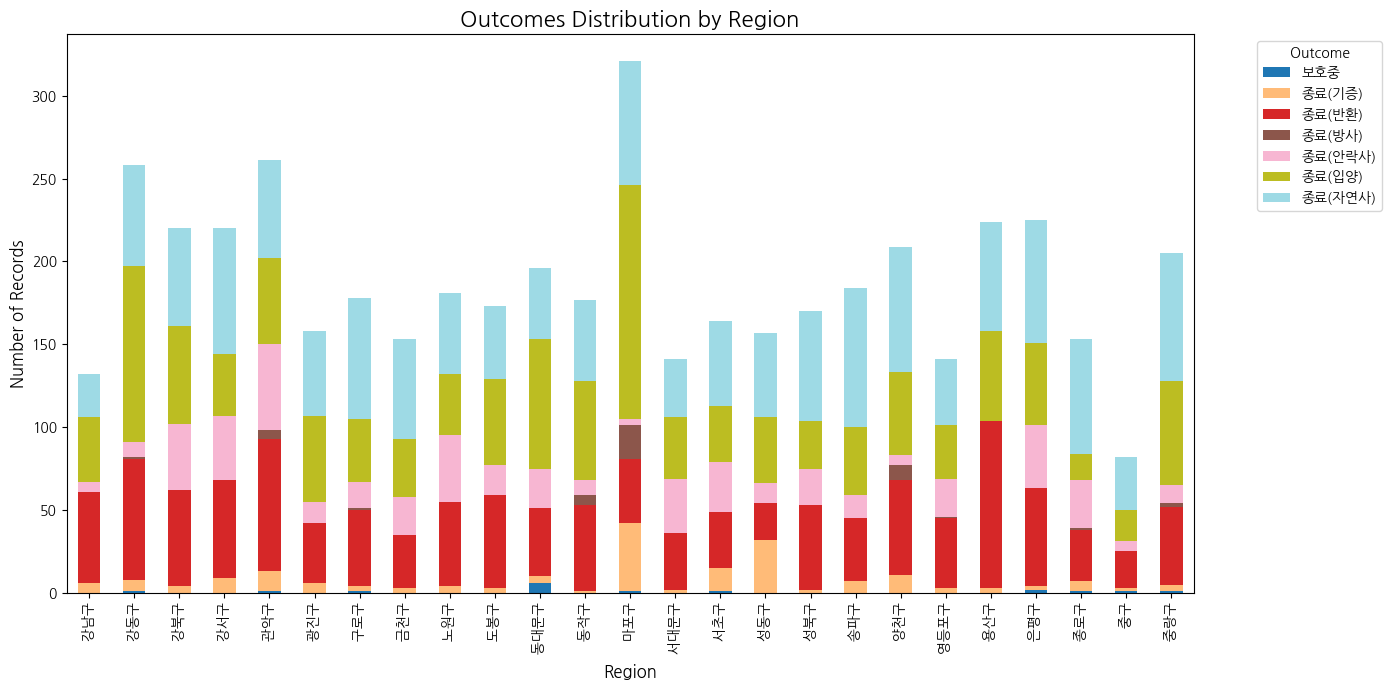

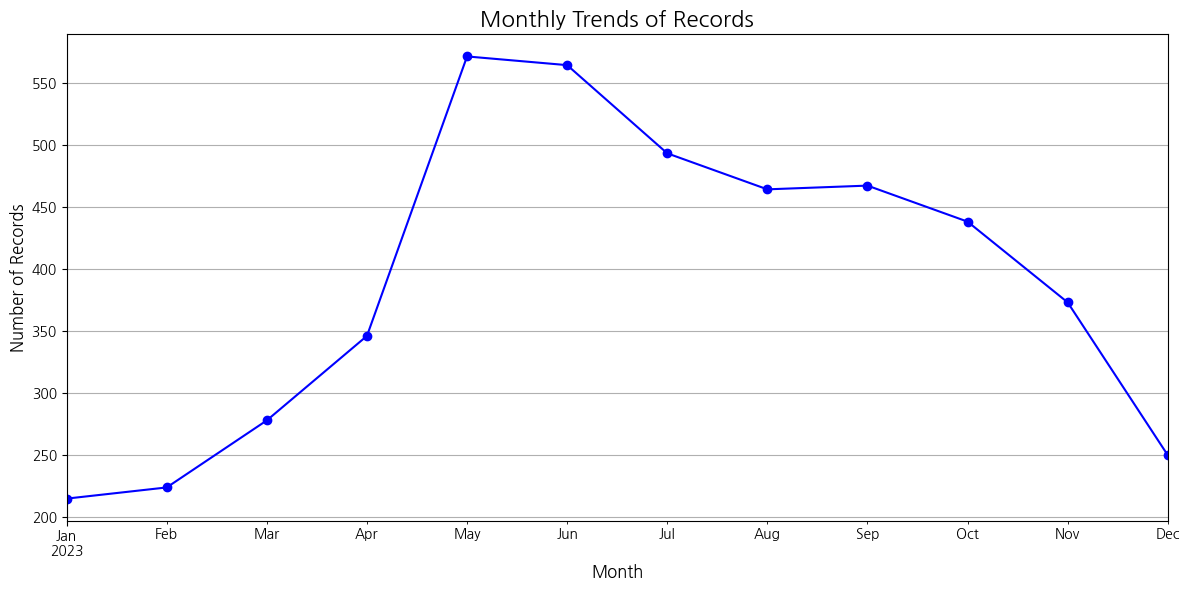

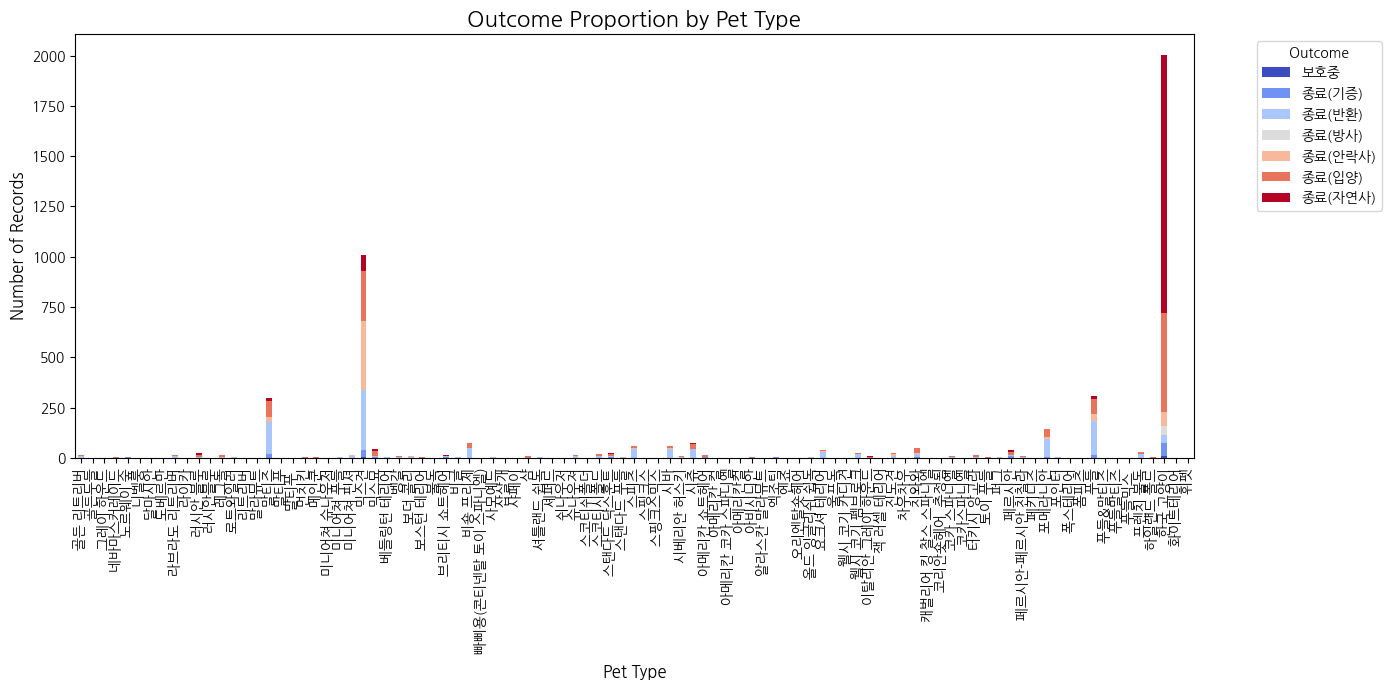

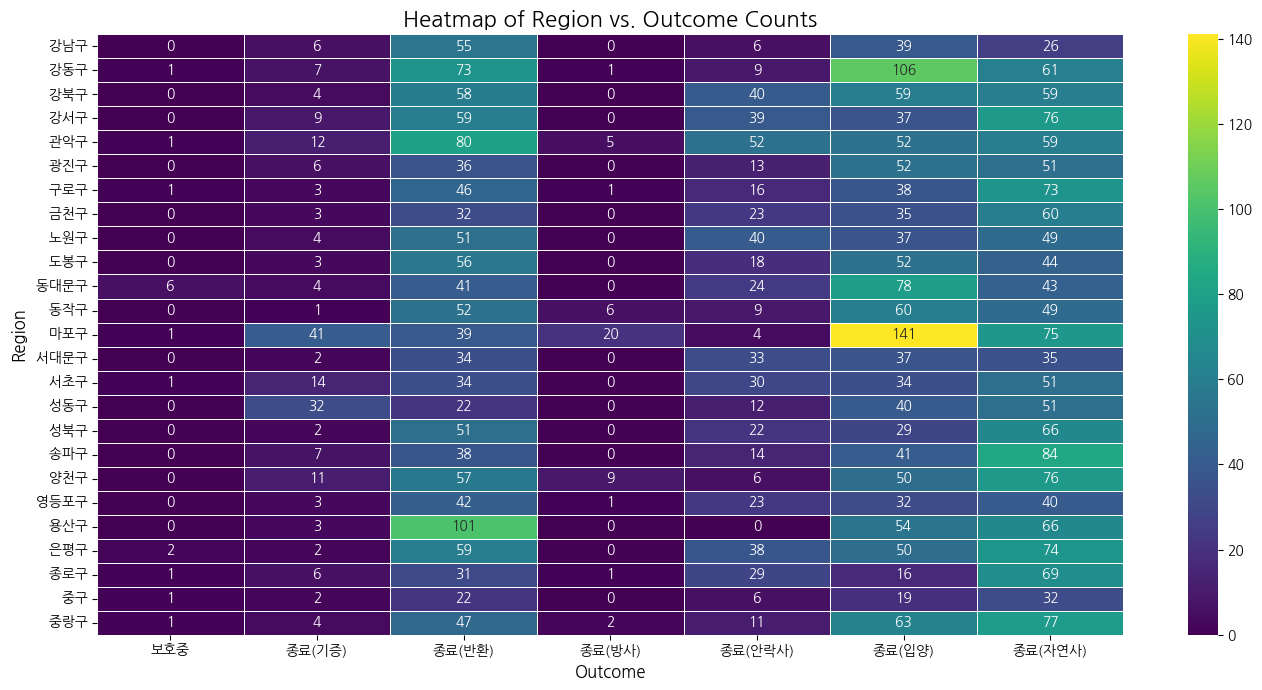

In [7]:
# 1. Outcomes Distribution by Region
outcomes_by_region = e_seoul_ugi_df.groupby(['region_id', 'result_id']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 7))
outcomes_by_region.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('Outcomes Distribution by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. Monthly Trends of Records
monthly_records = e_seoul_ugi_df.groupby(e_seoul_ugi_df['date'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
monthly_records.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Trends of Records', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

# 3. Outcome Proportion by Pet Type
pet_outcomes = e_seoul_ugi_df.groupby(['pet_type_id', 'result_id']).size().unstack(fill_value=0)
pet_outcomes.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='coolwarm')
plt.title('Outcome Proportion by Pet Type', fontsize=16)
plt.xlabel('Pet Type', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. Heatmap for Region vs. Outcome Counts
plt.figure(figsize=(14, 7))
sns.heatmap(outcomes_by_region, annot=True, fmt='d', cmap='viridis', linewidths=0.5)
plt.title('Heatmap of Region vs. Outcome Counts', fontsize=16)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.tight_layout()
plt.show()


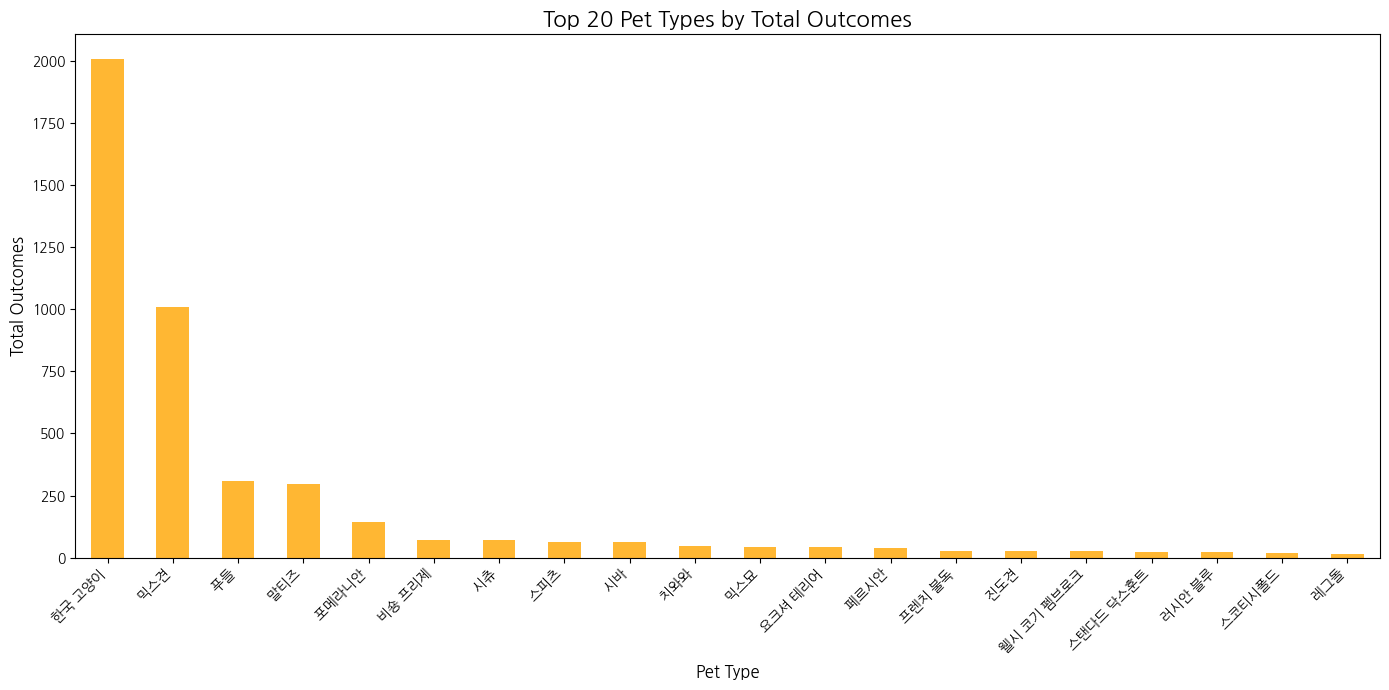

In [8]:
# Aggregating data for pet type and outcomes
pet_outcomes_sum = pet_outcomes.sum(axis=1).sort_values(ascending=False).head(20)

# Plotting top 20 pet types with the highest total outcomes
plt.figure(figsize=(14, 7))
pet_outcomes_sum.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Top 20 Pet Types by Total Outcomes', fontsize=16)
plt.xlabel('Pet Type', fontsize=12)
plt.ylabel('Total Outcomes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


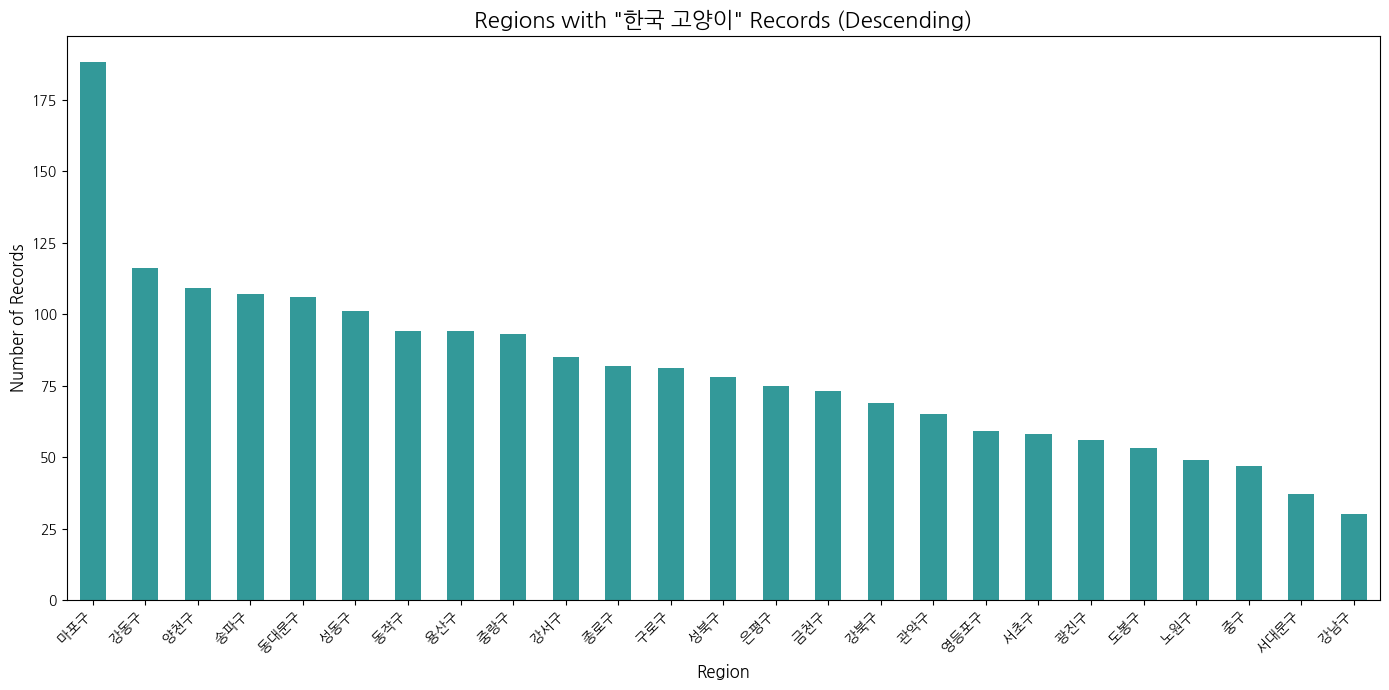

In [10]:
# Removing leading and trailing spaces from the 'pet_type_id' column
e_seoul_ugi_df['pet_type_id'] = e_seoul_ugi_df['pet_type_id'].str.strip()

# Re-checking for '한국 고양이' after cleaning
korean_cat_region_counts = e_seoul_ugi_df[e_seoul_ugi_df['pet_type_id'] == '한국 고양이']['region_id'].value_counts()

# Plotting the data if records exist
if not korean_cat_region_counts.empty:
    plt.figure(figsize=(14, 7))
    korean_cat_region_counts.plot(kind='bar', color='teal', alpha=0.8)
    plt.title('Regions with "한국 고양이" Records (Descending)', fontsize=16)
    plt.xlabel('Region', fontsize=12)
    plt.ylabel('Number of Records', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No records found for '한국 고양이' after cleaning.")

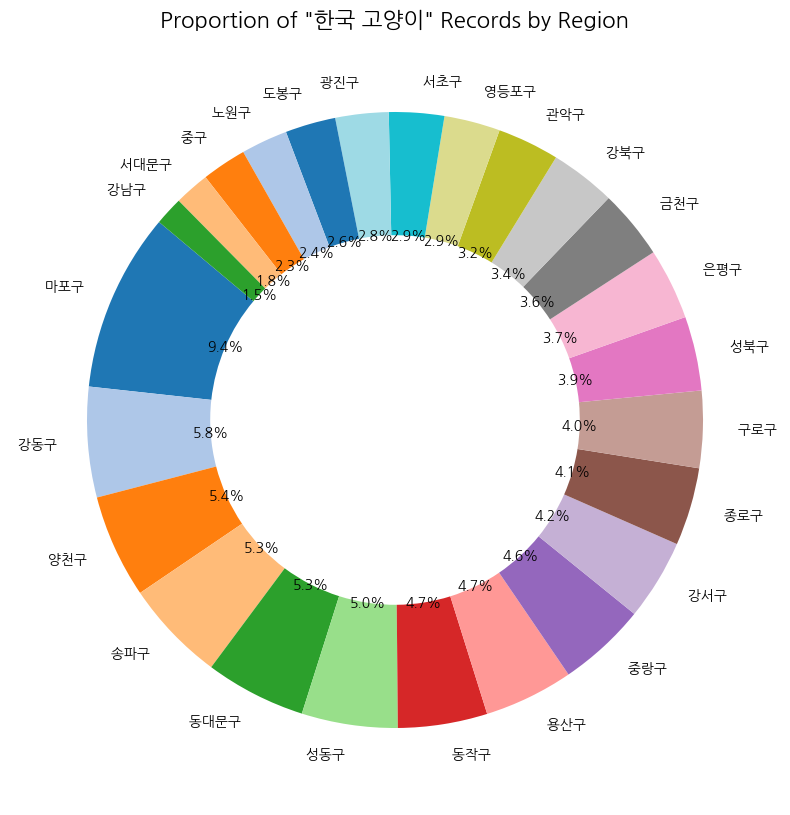

In [11]:
# Calculate the proportions for a donut chart
korean_cat_region_proportions = korean_cat_region_counts / korean_cat_region_counts.sum()

# Plotting the donut chart
plt.figure(figsize=(10, 10))
plt.pie(korean_cat_region_proportions, labels=korean_cat_region_proportions.index, autopct='%1.1f%%',
        startangle=140, colors=plt.cm.tab20.colors, wedgeprops=dict(width=0.4))
plt.title('Proportion of "한국 고양이" Records by Region', fontsize=16)
plt.show()


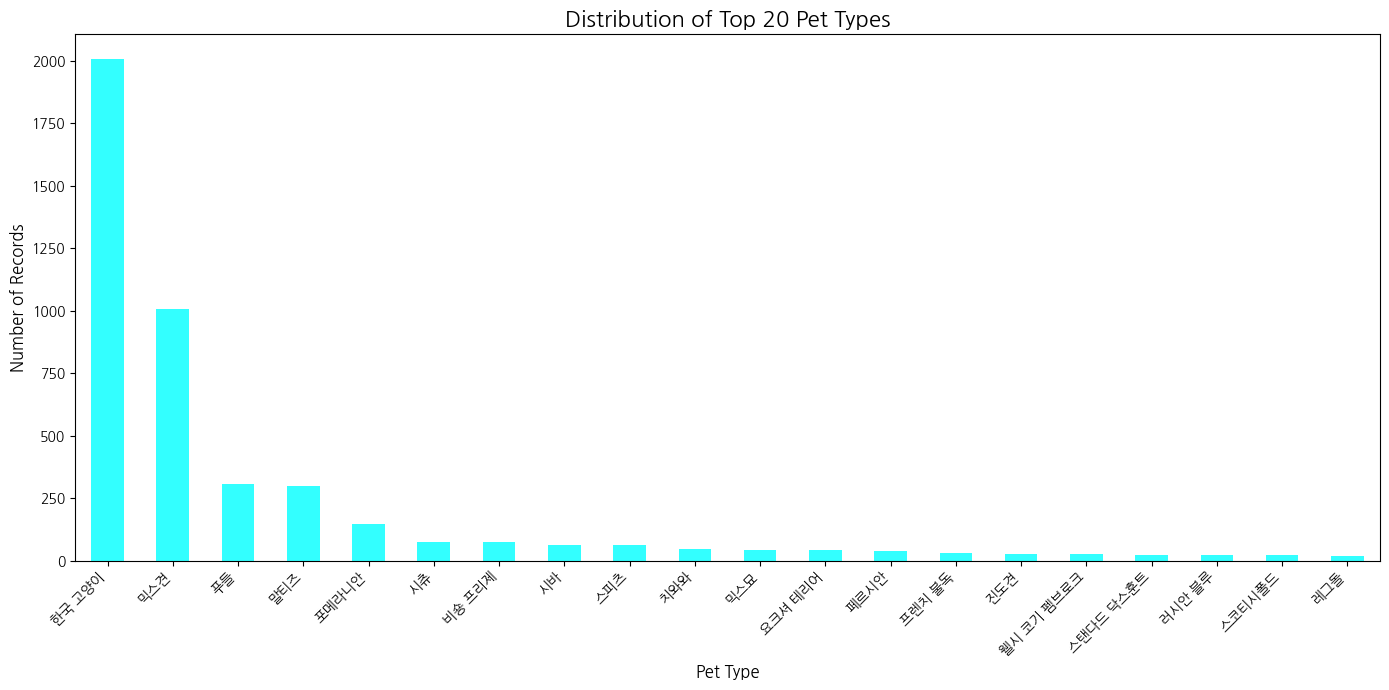

In [12]:
# Aggregate data to find the counts of each pet type
pet_type_counts = e_seoul_ugi_df['pet_type_id'].value_counts()

# Selecting the top 20 pet types
top_20_pet_types = pet_type_counts.head(20)

# Plotting the distribution of top 20 pet types
plt.figure(figsize=(14, 7))
top_20_pet_types.plot(kind='bar', color='cyan', alpha=0.8)
plt.title('Distribution of Top 20 Pet Types', fontsize=16)
plt.xlabel('Pet Type', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


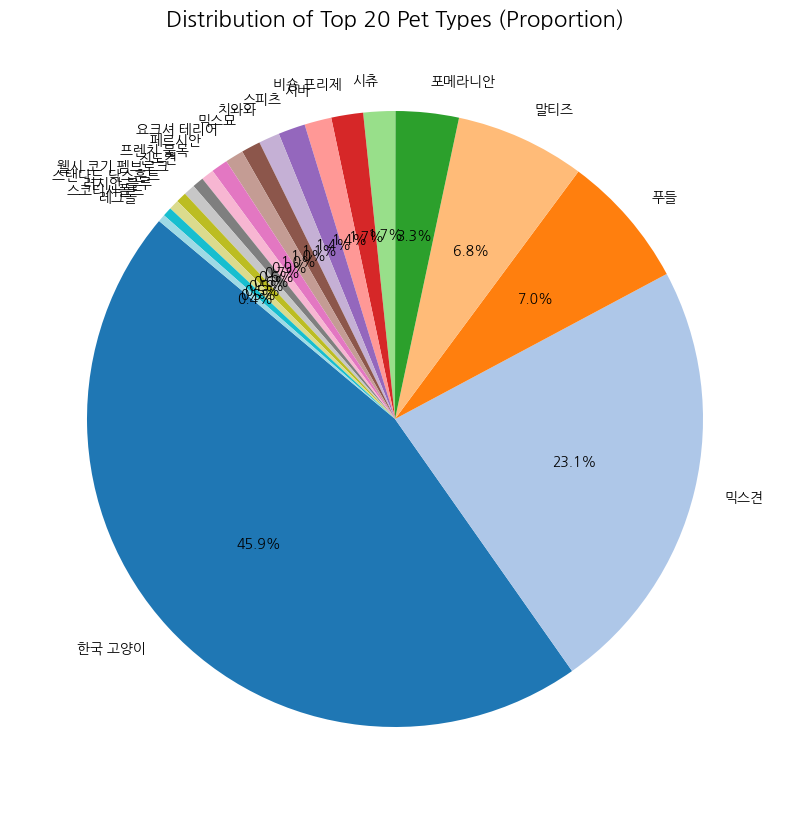

In [13]:
# Plotting the distribution of top 20 pet types as a pie chart
plt.figure(figsize=(10, 10))
plt.pie(top_20_pet_types, labels=top_20_pet_types.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Top 20 Pet Types (Proportion)', fontsize=16)
plt.show()


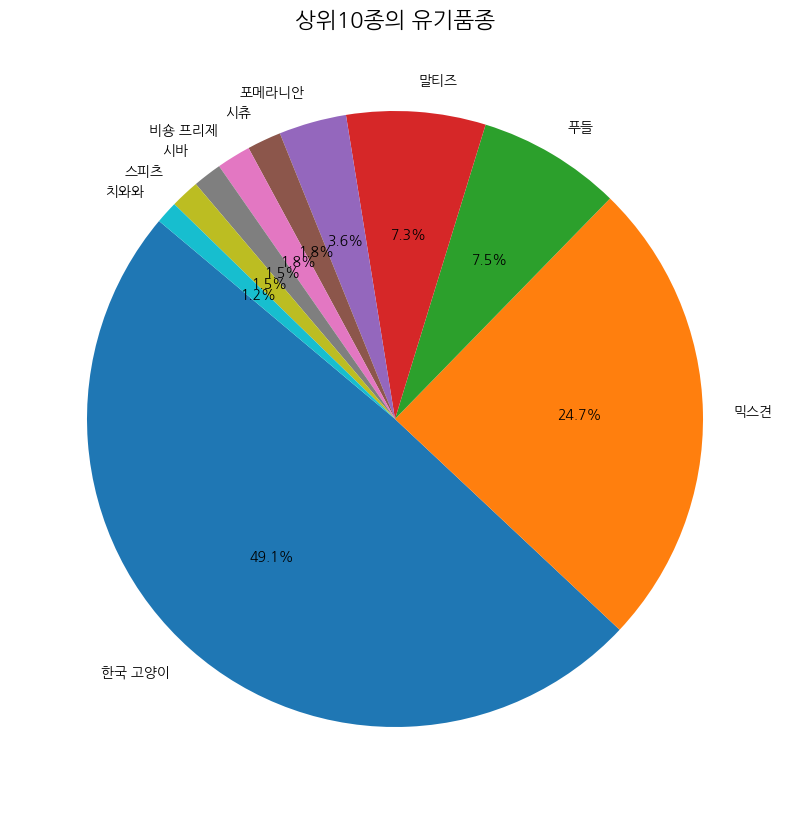

In [14]:
# Selecting the top 10 pet types
top_10_pet_types = pet_type_counts.head(10)

# Plotting the distribution of top 10 pet types as a pie chart
plt.figure(figsize=(10, 10))
plt.pie(top_10_pet_types, labels=top_10_pet_types.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('상위10종의 유기품종', fontsize=16)
plt.show()
